# Main file where where simulation is run

In [1]:
##  load all the dependencies and files needed
%run loadpackagesandfiles.ipynb


In [2]:
##  create a graph of the loaded data, 
## gives access to variable FG which is the (directed) graph displayed below 
## (if it is not shown the plot can be activated by uncommenting in buildgraph.ipynb file)

%run buildgraph.ipynb
%run EnviromentReport.ipynb

#%run locktest.ipynb

found restriction 8.7


In [3]:

# loop over edges with data and check voorwaarden
'''
for edge in FG_S.edges(data=True):
    if edge[0] in [182]:
        print(edge)
    if edge[1] in [182]:
        print(edge)
    if edge[0] in [132]:
        print(edge)
    if edge[1] in [132]:
        print(edge)


# same for nodes
for node in FG.nodes(data=True):
    if node[0] == 155:
        print(node)
    if node[0] == 156:
        print(node)
    if node[0] == 73:
        print(node)
    if node[0] == 72:
        print(node)

'''


'\nfor edge in FG_S.edges(data=True):\n    if edge[0] in [182]:\n        print(edge)\n    if edge[1] in [182]:\n        print(edge)\n    if edge[0] in [132]:\n        print(edge)\n    if edge[1] in [132]:\n        print(edge)\n\n\n# same for nodes\nfor node in FG.nodes(data=True):\n    if node[0] == 155:\n        print(node)\n    if node[0] == 156:\n        print(node)\n    if node[0] == 73:\n        print(node)\n    if node[0] == 72:\n        print(node)\n\n'

In [4]:
## obtain the paths possible sorted by length 
## (these paths are classes containing node keys and path lengths (in meter?))
%run get_paths.ipynb
#%run testpaths.ipynb

## below you see the data that is contained in a path

In [5]:
print(len(ordered_paths))
#ordered_paths[8].plot(FG, save=True)


54


In [6]:
%run vessels.ipynb

In [7]:
#list_with_vessels = init_vessels([M8, M8_high, M8_loaded_low, M8_loaded], ordered_paths)
#new
#list_with_vesselsM1 = init_vessels([M1, M1_loaded], ordered_paths)

In [8]:
def start(env, vessel):
    while True:
        
        vessel.log_entry("Start sailing", env.now, "", vessel.geometry)
        yield from vessel.move()
        vessel.log_entry("Stop sailing", env.now, "", vessel.geometry)
        vessel.report()
        if vessel.geometry == nx.get_node_attributes(FG, "geometry")[vessel.route[-1]]:
            break

Queues:  Krammerlock 0 0 0.9510782617648808
Queues:  Kreekraklock 0 0 1.401306127589149
Queues:  Krammerlock 0 0 2.7727093560840705
Queues:  Kreekraklock 0 0 2.8017247529898714
Queues:  Hansweertlock 0 0 3.2879286445785207
Queues:  Kreekraklock 0 0 3.3187588504636967
Queues:  Kreekraklock 0 0 3.598558357183477
Queues:  Kreekraklock 0 0 3.6075164185564628
Queues:  Kreekraklock 0 0 3.7184037345160292
Queues:  Kreekraklock 0 0 3.7834354172524365
Queues:  Kreekraklock 0 1 3.866003366341056
Queues:  Kreekraklock 0 1 3.9083744238258094
Queues:  Kreekraklock 0 1 4.016906800897679
Queues:  Kreekraklock 0 1 4.019042610030582
Queues:  Kreekraklock 0 0 4.739252235041776
Queues:  Kreekraklock 0 0 4.760097701581131
Queues:  Kreekraklock 0 0 4.7686992561654575
Queues:  Hansweertlock 0 0 4.857911577910625
Queues:  Kreekraklock 0 0 5.078079115783236
Queues:  Kreekraklock 0 0 5.0946284792230045
Queues:  Kreekraklock 0 1 5.147780276494191
Queues:  Kreekraklock 0 0 5.296157455718898
Queues:  Kreekraklock

Queues:  Krammerlock 2 1 14.320611651655327
Queues:  Hansweertlock 0 0 14.345555220326524
Queues:  Krammerlock 2 0 14.367037750284918
Queues:  Kreekraklock 0 0 14.367493257151787
Queues:  Hansweertlock 0 0 14.406111938179981
Queues:  Kreekraklock 0 0 14.415491419848996
Queues:  Kreekraklock 0 0 14.427516975033381
Queues:  Kreekraklock 0 0 14.59064729613588
Queues:  Hansweertlock 0 0 14.591887606167393
Queues:  Kreekraklock 0 0 14.626604801339733
Queues:  Krammerlock 2 1 14.642979558705784
Queues:  Kreekraklock 0 0 14.680874075336513
Queues:  Kreekraklock 0 1 14.694856577572649
Queues:  Kreekraklock 0 2 14.758291503055728
Queues:  Kreekraklock 0 1 14.889954103271911
Queues:  Krammerlock 1 1 14.903710998811185
Queues:  Hansweertlock 0 1 14.925403082309492
Queues:  Krammerlock 0 2 14.969238588964329
Queues:  Kreekraklock 0 1 14.969334752308225
Queues:  Kreekraklock 0 1 14.969533319462132
Queues:  Hansweertlock 0 0 14.970173376325585
Queues:  Krammerlock 0 2 14.988279242720626
Queues:  Kre

Queues:  Krammerlock 0 1 24.05783475504601
Queues:  Kreekraklock 0 0 24.129441232504384
Queues:  Kreekraklock 0 0 24.216068222721944
Queues:  Krammerlock 0 0 24.23187899656512
Queues:  Hansweertlock 0 0 24.330181098941402
Queues:  Kreekraklock 0 0 24.589075179529285
Queues:  Kreekraklock 0 0 24.600721313939754
Queues:  Krammerlock 0 0 24.679783675610132
Queues:  Kreekraklock 0 0 24.83328653658238
Queues:  Hansweertlock 0 0 24.94811381869281
Queues:  Kreekraklock 0 0 25.01399827995889
Queues:  Krammerlock 0 0 25.10362175836558
Queues:  Hansweertlock 0 0 25.132754503744234
Queues:  Krammerlock 0 0 25.314096142211593
Queues:  Hansweertlock 0 0 25.52102050956689
Queues:  Krammerlock 0 0 25.56762246424907
Queues:  Krammerlock 0 0 25.680164652172877
Queues:  Hansweertlock 0 0 25.875392044239028
Queues:  Hansweertlock 0 0 26.023258587298844
Queues:  Kreekraklock 0 0 26.245150173922966
Queues:  Kreekraklock 0 0 26.31849888573055
Queues:  Kreekraklock 0 0 26.505411475989455
Queues:  Kreekrakloc

Queues:  Hansweertlock 0 0 36.99190853866489
Queues:  Kreekraklock 0 0 37.030487104449264
Queues:  Krammerlock 2 3 37.107530948774844
Queues:  Krammerlock 3 2 37.15879215157385
Queues:  Hansweertlock 0 0 37.164644190548806
Queues:  Kreekraklock 0 0 37.2371347576308
Queues:  Krammerlock 3 2 37.25291676961405
Queues:  Kreekraklock 0 0 37.273281669135905
Queues:  Krammerlock 3 2 37.2773232896576
Queues:  Hansweertlock 0 0 37.28335803302876
Queues:  Kreekraklock 0 0 37.28790289727529
Queues:  Krammerlock 2 3 37.315915997514686
Queues:  Hansweertlock 0 1 37.352788715315484
Queues:  Kreekraklock 0 1 37.35577021176267
Queues:  Kreekraklock 0 1 37.37495515755869
Queues:  Hansweertlock 0 0 37.38057885384917
Queues:  Hansweertlock 0 0 37.399576462117935
Queues:  Kreekraklock 0 0 37.46247346875548
Queues:  Krammerlock 3 3 37.48524075646939
Queues:  Kreekraklock 0 0 37.497516447269504
Queues:  Kreekraklock 0 0 37.5004456856837
Queues:  Hansweertlock 0 2 37.59638228038033
Queues:  Krammerlock 2 4 3

Queues:  Krammerlock 0 0 44.92264204801625
Queues:  Hansweertlock 0 0 44.929297803616365
Queues:  Hansweertlock 0 0 44.974280692148376
Queues:  Hansweertlock 0 0 45.01782508333894
Queues:  Kreekraklock 0 0 45.04590127558317
Queues:  Hansweertlock 0 1 45.15704683702615
Queues:  Krammerlock 0 0 45.16717010999352
Queues:  Kreekraklock 0 1 45.195159039395854
Queues:  Kreekraklock 0 1 45.27439934358136
Queues:  Krammerlock 0 0 45.28369018686049
Queues:  Kreekraklock 0 0 45.300845913766075
Queues:  Krammerlock 0 1 45.362197975433574
Queues:  Hansweertlock 0 0 45.599153345173164
Queues:  Krammerlock 0 0 45.6874766753111
Queues:  Kreekraklock 0 0 45.94966689238484
Queues:  Hansweertlock 0 0 45.97134824317579
Queues:  Kreekraklock 0 0 45.9973796235425
Queues:  Krammerlock 0 0 46.049928760192486
Queues:  Hansweertlock 0 0 46.17943038416713
Queues:  Kreekraklock 0 0 46.197024172601715
Queues:  Krammerlock 0 0 46.31255359694054
Queues:  Hansweertlock 0 0 46.3172933533743
Queues:  Hansweertlock 0 0

Queues:  Kreekraklock 0 0 59.16521154636242
Queues:  Hansweertlock 0 0 59.198170697626225
Queues:  Kreekraklock 0 0 59.20213233350995
Queues:  Krammerlock 0 4 59.237640966276466
Queues:  Krammerlock 0 4 59.2430680255838
Queues:  Hansweertlock 0 1 59.26100284825273
Queues:  Hansweertlock 0 1 59.26964227894276
Queues:  Hansweertlock 0 1 59.30899941015109
Queues:  Hansweertlock 0 1 59.37104880129235
Queues:  Hansweertlock 2 0 59.57176354444991
Queues:  Krammerlock 0 3 59.599696832338665
Queues:  Hansweertlock 2 0 59.61825285154657
Queues:  Hansweertlock 2 0 59.630124595000446
Queues:  Krammerlock 0 3 59.656372961990925
Queues:  Kreekraklock 0 0 59.65799859913537
Queues:  Hansweertlock 2 1 59.709882146433365
Queues:  Hansweertlock 2 2 59.71637407718673
Queues:  Hansweertlock 0 2 59.75374221580275
Queues:  Hansweertlock 0 4 59.774221730273446
Queues:  Hansweertlock 0 4 59.78041939131259
Queues:  Kreekraklock 0 0 59.840221553754525
Queues:  Hansweertlock 2 4 59.84050793718044
Queues:  Kreekr

Queues:  Kreekraklock 0 1 66.14645126484486
Queues:  Kreekraklock 0 1 66.18124885028382
Queues:  Hansweertlock 0 0 66.37657540575496
Queues:  Kreekraklock 0 0 66.38474526811852
Queues:  Hansweertlock 0 0 66.45464509196476
Queues:  Hansweertlock 0 1 66.48849668783636
Queues:  Kreekraklock 0 0 66.60358069049224
Queues:  Hansweertlock 0 0 66.63265832274443
Queues:  Krammerlock 0 0 66.677293567185
Queues:  Kreekraklock 0 1 66.70005332073622
Queues:  Krammerlock 0 0 66.79124990991724
Queues:  Hansweertlock 0 0 66.81308052915227
Queues:  Hansweertlock 0 0 66.81309214548921
Queues:  Krammerlock 0 0 66.82664974727238
Queues:  Hansweertlock 0 0 66.85805930258601
Queues:  Hansweertlock 0 3 66.9007135085775
Queues:  Kreekraklock 0 0 66.90573466331529
Queues:  Kreekraklock 0 0 66.93997039547668
Queues:  Kreekraklock 0 0 66.94079784644619
Queues:  Krammerlock 0 0 66.97492775395271
Queues:  Kreekraklock 0 0 67.03490638773114
Queues:  Hansweertlock 0 2 67.0672414702734
Queues:  Krammerlock 0 1 67.116

Queues:  Krammerlock 0 1 81.26076976568946
Queues:  Hansweertlock 0 0 81.27382790137445
Queues:  Kreekraklock 0 0 81.30610143426279
Queues:  Kreekraklock 0 0 81.33630522265543
Queues:  Krammerlock 0 1 81.36304782326668
Queues:  Kreekraklock 0 0 81.40687368646988
Queues:  Hansweertlock 0 0 81.4965477545583
Queues:  Hansweertlock 0 0 81.7184430451656
Queues:  Kreekraklock 0 0 81.7343851853542
Queues:  Hansweertlock 0 0 81.73828468513906
Queues:  Krammerlock 0 0 81.73872004954359
Queues:  Hansweertlock 0 1 81.8564245657704
Queues:  Hansweertlock 0 1 81.90492504110598
Queues:  Kreekraklock 0 0 81.91407600096456
Queues:  Kreekraklock 0 0 81.91543657825792
Queues:  Krammerlock 0 0 82.00979703793433
Queues:  Krammerlock 0 0 82.02010615305791
Queues:  Krammerlock 0 0 82.02195383630672
Queues:  Hansweertlock 0 0 82.06394380788181
Queues:  Kreekraklock 0 0 82.16537674374898
Queues:  Kreekraklock 0 1 82.20419347475082
Queues:  Krammerlock 0 1 82.28081804322618
Queues:  Kreekraklock 0 0 82.3951800

Queues:  Hansweertlock 0 0 88.87321379818941
Queues:  Kreekraklock 0 0 88.90955209588557
Queues:  Kreekraklock 0 0 88.97434805812279
Queues:  Hansweertlock 0 1 89.01102879669038
Queues:  Hansweertlock 0 1 89.0460416791196
Queues:  Hansweertlock 0 0 89.10187006343388
Queues:  Krammerlock 0 1 89.11692994567272
Queues:  Kreekraklock 0 0 89.22347595849156
Queues:  Kreekraklock 0 1 89.2762039503153
Queues:  Kreekraklock 0 0 89.36688224599567
Queues:  Kreekraklock 0 0 89.37291512672445
Queues:  Kreekraklock 0 0 89.38543472678784
Queues:  Kreekraklock 0 2 89.55658394636693
Queues:  Kreekraklock 0 2 89.56402346446116
Queues:  Hansweertlock 0 0 89.64428228522185
Queues:  Krammerlock 0 0 89.70204783413267
Queues:  Krammerlock 0 0 89.7408577967382
Queues:  Hansweertlock 0 0 89.8704746691484
Queues:  Kreekraklock 0 0 90.05091442910518
Queues:  Kreekraklock 0 0 90.05229348654058
Queues:  Hansweertlock 0 0 90.05604274912564
Queues:  Kreekraklock 0 0 90.0959074085617
Queues:  Krammerlock 0 0 90.11850

Queues:  Krammerlock 0 0 103.31549930689606
Queues:  Krammerlock 0 1 103.62655430861977
Queues:  Krammerlock 0 1 103.74223533016433
Queues:  Krammerlock 0 1 103.90720474704004
Queues:  Kreekraklock 0 0 103.92837194173964
Queues:  Krammerlock 0 0 104.06877845225928
Queues:  Kreekraklock 0 0 104.12859984914625
Queues:  Krammerlock 0 0 104.17347390531263
Queues:  Krammerlock 0 0 104.27647571971801
Queues:  Kreekraklock 0 0 104.39343818495696
Queues:  Hansweertlock 0 0 104.43393843139026
Queues:  Hansweertlock 0 0 104.53151143487612
Queues:  Kreekraklock 0 0 104.59364765706117
Queues:  Hansweertlock 0 0 104.62725301076878
Queues:  Kreekraklock 0 0 104.6425245957025
Queues:  Kreekraklock 0 0 104.72377828190038
Queues:  Hansweertlock 0 0 104.8180860523991
Queues:  Kreekraklock 0 0 104.87938553358397
Queues:  Krammerlock 0 0 104.93429832734627
Queues:  Kreekraklock 0 0 105.04697605408357
Queues:  Kreekraklock 0 0 105.0790178597585
Queues:  Hansweertlock 0 0 105.16898456278768
Queues:  Kreekra

Queues:  Kreekraklock 0 1 111.96523197479804
Queues:  Krammerlock 0 0 111.97816122363955
Queues:  Krammerlock 0 0 112.00543477541822
Queues:  Kreekraklock 0 1 112.02776055575193
Queues:  Kreekraklock 0 1 112.08492460854708
Queues:  Kreekraklock 2 1 112.14678792745204
Queues:  Hansweertlock 0 0 112.2188304739606
Queues:  Kreekraklock 1 2 112.23512722675953
Queues:  Krammerlock 0 1 112.25029112395218
Queues:  Hansweertlock 0 0 112.25622110514247
Queues:  Kreekraklock 2 2 112.26486981464426
Queues:  Kreekraklock 2 2 112.3062324938605
Queues:  Hansweertlock 0 0 112.30791498057684
Queues:  Krammerlock 0 1 112.32015091240066
Queues:  Krammerlock 0 1 112.33541091322505
Queues:  Kreekraklock 2 4 112.40656845089983
Queues:  Kreekraklock 2 2 112.49019679764069
Queues:  Krammerlock 0 1 112.49355602474843
Queues:  Kreekraklock 2 2 112.49385920955432
Queues:  Hansweertlock 0 2 112.49928405628377
Queues:  Hansweertlock 0 2 112.52021507570623
Queues:  Hansweertlock 0 2 112.52350979799041
Queues:  Kra

Queues:  Krammerlock 0 0 123.96090090795427
Queues:  Hansweertlock 0 0 124.0517899440278
Queues:  Krammerlock 0 1 124.13838715052422
Queues:  Krammerlock 0 1 124.17439456876187
Queues:  Kreekraklock 0 0 124.33051495306741
Queues:  Kreekraklock 0 0 124.46013285254332
Queues:  Kreekraklock 0 0 124.65654286853568
Queues:  Kreekraklock 0 0 124.66521688178781
Queues:  Hansweertlock 0 0 124.70555115097113
Queues:  Kreekraklock 0 0 124.72457058927996
Queues:  Hansweertlock 0 0 124.80549700529902
Queues:  Kreekraklock 0 1 124.8154237452731
Queues:  Krammerlock 0 0 124.92826019383084
Queues:  Krammerlock 0 0 125.46713999737126
Queues:  Krammerlock 0 0 125.54137915590795
Queues:  Krammerlock 0 0 125.62956643191814
Queues:  Krammerlock 0 1 125.71268091940382
Queues:  Kreekraklock 0 0 125.75526463426036
Queues:  Hansweertlock 0 0 125.83699599893279
Queues:  Krammerlock 0 0 125.95641498460519
Queues:  Hansweertlock 0 0 126.04550003587009
Queues:  Kreekraklock 0 0 126.08877912205452
Queues:  Kreekra

Queues:  Hansweertlock 0 2 134.00218826267408
Queues:  Kreekraklock 0 1 134.10543606223553
Queues:  Kreekraklock 0 1 134.1103245128634
Queues:  Krammerlock 0 0 134.17635317185471
Queues:  Hansweertlock 0 1 134.1770267958483
Queues:  Kreekraklock 0 0 134.20852457937752
Queues:  Kreekraklock 0 0 134.25251215012182
Queues:  Hansweertlock 0 0 134.2554081682353
Queues:  Kreekraklock 0 0 134.25703931067625
Queues:  Krammerlock 0 0 134.3279531239603
Queues:  Krammerlock 0 0 134.36568555623353
Queues:  Kreekraklock 0 0 134.50226230033326
Queues:  Krammerlock 0 1 134.5174191660381
Queues:  Kreekraklock 0 0 134.53581708982918
Queues:  Hansweertlock 0 0 134.55799549333204
Queues:  Kreekraklock 0 2 134.58778921794234
Queues:  Hansweertlock 0 0 134.64487461768016
Queues:  Kreekraklock 0 2 134.68453038682154
Queues:  Hansweertlock 0 0 134.69850745440522
Queues:  Krammerlock 0 0 134.72528865487433
Queues:  Kreekraklock 0 2 134.72750899619206
Queues:  Krammerlock 0 0 134.7344935934619
Queues:  Krammer

Queues:  Hansweertlock 0 0 142.26066922300768
Queues:  Kreekraklock 0 0 142.3243712287175
Queues:  Krammerlock 0 0 142.3411374655563
Queues:  Kreekraklock 0 0 142.38665588185467
Queues:  Kreekraklock 0 0 142.8904582792183
Queues:  Hansweertlock 0 0 143.03279905518482
Queues:  Kreekraklock 0 0 143.05661775615175
Queues:  Krammerlock 0 0 143.20908083595478
Queues:  Hansweertlock 0 0 143.34767585922808
Queues:  Hansweertlock 0 0 143.37128245601363
Queues:  Krammerlock 0 0 143.42107089887395
Queues:  Hansweertlock 0 0 143.43467964076657
Queues:  Hansweertlock 0 0 143.52844924826368
Queues:  Hansweertlock 0 1 143.65501043028712
Queues:  Krammerlock 0 0 143.66772558927616
Queues:  Kreekraklock 0 0 143.72877544590577
Queues:  Hansweertlock 0 1 143.85279547907137
Queues:  Kreekraklock 0 0 144.0015469369181
Queues:  Hansweertlock 0 0 144.07791065860084
Queues:  Kreekraklock 0 0 144.14684192130494
Queues:  Hansweertlock 0 0 144.16568452827067
Queues:  Hansweertlock 0 0 144.27632930594208
Queues:

Queues:  Krammerlock 0 0 156.44939045677467
Queues:  Hansweertlock 0 0 156.4895849954638
Queues:  Kreekraklock 0 0 156.49930660776772
Queues:  Kreekraklock 0 0 156.5061178730002
Queues:  Kreekraklock 0 0 156.51084052868873
Queues:  Krammerlock 0 1 156.52797667689222
Queues:  Kreekraklock 0 0 156.57858040838738
Queues:  Kreekraklock 0 0 156.60096318384018
Queues:  Kreekraklock 0 2 156.65048986194228
Queues:  Krammerlock 0 0 156.65821969729757
Queues:  Hansweertlock 0 0 156.7257127354244
Queues:  Kreekraklock 0 2 156.7319070950132
Queues:  Hansweertlock 0 0 156.73233605338484
Queues:  Krammerlock 0 1 156.78925215036688
Queues:  Krammerlock 0 1 156.88987089548283
Queues:  Kreekraklock 0 1 156.89637494765137
Queues:  Hansweertlock 0 0 156.99232732971015
Queues:  Hansweertlock 0 1 157.0697189881619
Queues:  Hansweertlock 0 1 157.1553650129801
Queues:  Kreekraklock 0 0 157.15855319327576
Queues:  Krammerlock 0 0 157.2083239399767
Queues:  Krammerlock 0 0 157.21147808034968
Queues:  Krammerlo

Queues:  Kreekraklock 0 0 164.45519754703076
Queues:  Kreekraklock 0 0 164.47711310705512
Queues:  Hansweertlock 0 0 164.520496013126
Queues:  Hansweertlock 0 0 164.5844593037923
Queues:  Hansweertlock 0 0 164.61547368854113
Queues:  Krammerlock 0 0 164.64672647687982
Queues:  Hansweertlock 0 0 164.6617557280334
Queues:  Krammerlock 0 0 164.95025299713626
Queues:  Hansweertlock 0 1 164.99421606026814
Queues:  Kreekraklock 0 0 165.02562674532876
Queues:  Kreekraklock 0 0 165.03565396933902
Queues:  Kreekraklock 0 0 165.07361615574462
Queues:  Krammerlock 0 0 165.36264201290388
Queues:  Krammerlock 0 0 165.3632486001784
Queues:  Kreekraklock 0 0 165.38869293864877
Queues:  Kreekraklock 0 0 165.4167067026687
Queues:  Krammerlock 0 0 165.419181688697
Queues:  Hansweertlock 0 0 165.4241484457702
Queues:  Kreekraklock 0 0 165.4356269395514
Queues:  Krammerlock 0 2 165.48673068413333
Queues:  Kreekraklock 0 1 165.54640883612868
Queues:  Hansweertlock 0 0 165.55131016624355
Queues:  Kreekraklo

Queues:  Kreekraklock 0 0 178.89170684952938
Queues:  Hansweertlock 0 0 179.06297895680737
Queues:  Hansweertlock 0 0 179.08586932035124
Queues:  Kreekraklock 0 0 179.16533237107708
Queues:  Hansweertlock 0 0 179.17999285371096
Queues:  Kreekraklock 0 1 179.21530925570983
Queues:  Hansweertlock 0 0 179.22375343896348
Queues:  Krammerlock 0 0 179.2988202544587
Queues:  Hansweertlock 0 1 179.30600641425758
Queues:  Kreekraklock 0 0 179.3503191128673
Queues:  Krammerlock 0 0 179.41571461684117
Queues:  Kreekraklock 0 0 179.44385248574804
Queues:  Kreekraklock 0 1 179.50026887785023
Queues:  Krammerlock 0 0 179.50061268572802
Queues:  Kreekraklock 0 0 179.54627974040315
Queues:  Krammerlock 0 0 179.6177299903998
Queues:  Hansweertlock 0 0 179.62497198045546
Queues:  Kreekraklock 0 0 179.62976107693757
Queues:  Krammerlock 0 0 179.62981061880203
Queues:  Kreekraklock 0 0 179.64688381492638
Queues:  Hansweertlock 0 0 179.66188808131076
Queues:  Krammerlock 0 2 179.77699314292954
Queues:  Kra

Queues:  Kreekraklock 0 0 186.3424136737616
Queues:  Krammerlock 0 3 186.37921054107983
Queues:  Krammerlock 0 3 186.3818424030563
Queues:  Kreekraklock 0 1 186.3819502344544
Queues:  Hansweertlock 0 0 186.4321860844628
Queues:  Hansweertlock 0 1 186.50862300972122
Queues:  Krammerlock 1 2 186.54085205061256
Queues:  Krammerlock 1 2 186.78523288172383
Queues:  Kreekraklock 0 0 186.8045065984603
Queues:  Hansweertlock 0 0 186.83269384766314
Queues:  Hansweertlock 0 0 186.84203171142994
Queues:  Hansweertlock 0 0 186.86114433073934
Queues:  Hansweertlock 0 1 186.95520422505032
Queues:  Krammerlock 2 1 186.95974277727055
Queues:  Hansweertlock 0 1 186.97595302600357
Queues:  Kreekraklock 0 0 187.0562662221595
Queues:  Kreekraklock 0 0 187.0907040431856
Queues:  Kreekraklock 0 0 187.37781399268835
Queues:  Krammerlock 0 0 187.42037890714377
Queues:  Kreekraklock 0 0 187.46180278070352
Queues:  Kreekraklock 0 0 187.51471817590956
Queues:  Kreekraklock 0 0 187.5485498396725
Queues:  Hansweer

Queues:  Krammerlock 0 0 200.2229384640377
Queues:  Kreekraklock 0 1 200.24899485125437
Queues:  Hansweertlock 0 0 200.3866569266797
Queues:  Kreekraklock 0 0 200.38855479124496
Queues:  Hansweertlock 0 0 200.5255796987727
Queues:  Krammerlock 0 1 200.5534699702937
Queues:  Kreekraklock 0 0 200.55432105670005
Queues:  Kreekraklock 0 0 200.56182005014406
Queues:  Kreekraklock 0 1 200.59145591798054
Queues:  Kreekraklock 0 1 200.5934710837644
Queues:  Kreekraklock 0 0 200.84582247703378
Queues:  Kreekraklock 0 0 200.91527170340964
Queues:  Hansweertlock 0 0 200.93571662479812
Queues:  Hansweertlock 0 0 200.95718854935762
Queues:  Hansweertlock 0 1 201.0923300468723
Queues:  Kreekraklock 0 0 201.28210630325316
Queues:  Kreekraklock 0 0 201.29693476649726
Queues:  Kreekraklock 0 0 201.3583210851634
Queues:  Kreekraklock 0 0 201.38776485544568
Queues:  Hansweertlock 0 0 201.5933411906797
Queues:  Kreekraklock 0 0 201.62257392327194
Queues:  Krammerlock 0 0 201.63210656838604
Queues:  Kramme

Queues:  Kreekraklock 0 1 208.48671464765522
Queues:  Hansweertlock 0 0 208.57284957004453
Queues:  Kreekraklock 0 0 208.6011150720579
Queues:  Kreekraklock 0 0 208.60499697436327
Queues:  Krammerlock 0 0 208.6194610371713
Queues:  Hansweertlock 0 0 208.71026233743407
Queues:  Kreekraklock 0 0 208.7143939318835
Queues:  Krammerlock 0 0 208.72548663566795
Queues:  Kreekraklock 0 1 208.7568583359236
Queues:  Hansweertlock 0 0 208.94308680976204
Queues:  Krammerlock 0 0 208.98661221196178
Queues:  Kreekraklock 0 0 209.00834475907507
Queues:  Krammerlock 0 1 209.055019674289
Queues:  Kreekraklock 0 0 209.1483352097566
Queues:  Kreekraklock 0 0 209.18917355959343
Queues:  Hansweertlock 0 0 209.20953593659416
Queues:  Kreekraklock 0 1 209.25011799930655
Queues:  Krammerlock 0 1 209.25804646884862
Queues:  Kreekraklock 0 1 209.28291181361718
Queues:  Hansweertlock 0 0 209.30894610541125
Queues:  Kreekraklock 0 1 209.31048168572548
Queues:  Krammerlock 0 0 209.35859873277823
Queues:  Hansweert

Queues:  Kreekraklock 0 1 222.8418208735876
Queues:  Kreekraklock 0 0 223.05718047623344
Queues:  Krammerlock 0 0 223.32038668353957
Queues:  Kreekraklock 0 0 223.32407749865385
Queues:  Kreekraklock 0 0 223.35394413262588
Queues:  Hansweertlock 0 0 223.5930573018301
Queues:  Kreekraklock 0 0 223.63612096001822
Queues:  Hansweertlock 0 0 223.73767230108396
Queues:  Krammerlock 0 0 223.7660072553211
Queues:  Kreekraklock 0 0 223.7958837644603
Queues:  Hansweertlock 0 0 223.84512199497354
Queues:  Kreekraklock 0 0 223.86005945676203
Queues:  Krammerlock 0 0 224.07026042428004
Queues:  Kreekraklock 0 0 224.07368162516246
Queues:  Kreekraklock 0 0 224.19411041373755
Queues:  Kreekraklock 0 0 224.30830820570603
Queues:  Krammerlock 0 0 224.5289358941058
Queues:  Kreekraklock 0 0 224.53285012448458
Queues:  Hansweertlock 0 0 224.53911614549
Queues:  Krammerlock 0 0 224.55099630372013
Queues:  Hansweertlock 0 0 224.57448925708226
Queues:  Hansweertlock 0 0 224.57456415351615
Queues:  Kreekrak

Queues:  Kreekraklock 2 2 231.56295600334923
Queues:  Kreekraklock 2 2 231.5631929414512
Queues:  Krammerlock 0 0 231.67466691902746
Queues:  Krammerlock 0 0 231.74968752389776
Queues:  Kreekraklock 0 1 231.83282765568856
Queues:  Hansweertlock 0 0 231.9360752226579
Queues:  Krammerlock 0 0 231.94589991527621
Queues:  Hansweertlock 0 0 231.99204103313662
Queues:  Kreekraklock 0 0 231.99358296165903
Queues:  Krammerlock 0 1 232.00010620554343
Queues:  Hansweertlock 0 0 232.0018231719505
Queues:  Kreekraklock 0 1 232.06755578754363
Queues:  Hansweertlock 0 2 232.16687481940264
Queues:  Hansweertlock 0 2 232.18108145944436
Queues:  Krammerlock 0 1 232.25610570875853
Queues:  Krammerlock 0 0 232.29906317505043
Queues:  Kreekraklock 0 0 232.301612654464
Queues:  Kreekraklock 0 0 232.36960147986477
Queues:  Krammerlock 0 0 232.37643778684125
Queues:  Kreekraklock 0 0 232.38818537306182
Queues:  Hansweertlock 0 0 232.4533646439924
Queues:  Hansweertlock 0 0 232.49417204874555
Queues:  Kreekra

Queues:  Krammerlock 0 0 243.97024038678444
Queues:  Hansweertlock 0 0 244.0300158338626
Queues:  Krammerlock 0 0 244.12484724268384
Queues:  Kreekraklock 0 0 244.17089929073987
Queues:  Hansweertlock 0 0 244.18407239817438
Queues:  Kreekraklock 0 0 244.22014317325159
Queues:  Kreekraklock 0 0 244.49865839947907
Queues:  Kreekraklock 0 0 244.5310611426832
Queues:  Kreekraklock 0 0 244.58465860783977
Queues:  Kreekraklock 0 0 244.67633004679954
Queues:  Kreekraklock 0 0 244.72268621663542
Queues:  Hansweertlock 0 0 244.87165599650857
Queues:  Hansweertlock 0 0 244.92135880608302
Queues:  Kreekraklock 0 0 245.05845286697635
Queues:  Hansweertlock 0 0 245.15548288710303
Queues:  Hansweertlock 0 0 245.18902206786635
Queues:  Kreekraklock 0 0 245.20593243357078
Queues:  Kreekraklock 0 0 245.67044558479023
Queues:  Hansweertlock 0 0 245.7519448433204
Queues:  Hansweertlock 0 0 245.893230798438
Queues:  Kreekraklock 0 0 246.05229505852705
Queues:  Krammerlock 0 0 246.0592389982579
Queues:  Kr

Queues:  Krammerlock 1 0 254.5385898967948
Queues:  Kreekraklock 0 1 254.54309375076258
Queues:  Krammerlock 1 0 254.562430475104
Queues:  Hansweertlock 0 1 254.6574185095393
Queues:  Kreekraklock 0 0 254.72786278681878
Queues:  Krammerlock 0 1 254.72951744066864
Queues:  Hansweertlock 0 1 254.76913522691288
Queues:  Krammerlock 0 1 254.77139014301625
Queues:  Hansweertlock 0 0 254.80816052573962
Queues:  Kreekraklock 0 0 254.83744284806815
Queues:  Kreekraklock 0 0 254.8600359601373
Queues:  Krammerlock 0 0 254.89264781110342
Queues:  Krammerlock 0 0 254.9127242144359
Queues:  Hansweertlock 0 0 254.9685816130197
Queues:  Kreekraklock 0 1 254.96876540639914
Queues:  Hansweertlock 0 1 255.09801966433372
Queues:  Kreekraklock 0 0 255.1632850378446
Queues:  Krammerlock 0 1 255.19570494947504
Queues:  Hansweertlock 0 0 255.20571092248798
Queues:  Kreekraklock 0 1 255.20840099755875
Queues:  Kreekraklock 0 1 255.22570311042548
Queues:  Kreekraklock 0 1 255.243894865183
Queues:  Kreekraklock

Queues:  Kreekraklock 0 0 264.22302596276444
Queues:  Krammerlock 0 0 264.3030393869821
Queues:  Krammerlock 0 0 264.32780555903213
Queues:  Hansweertlock 0 0 264.4394742714158
Queues:  Kreekraklock 0 0 264.57750509380816
Queues:  Krammerlock 0 1 264.60473126165704
Queues:  Krammerlock 0 1 264.7415078497747
Queues:  Krammerlock 0 1 264.74475389752195
Queues:  Hansweertlock 0 0 264.79315959731974
Queues:  Kreekraklock 0 0 264.850313527542
Queues:  Hansweertlock 0 0 264.9185625511185
Queues:  Krammerlock 0 0 265.18909031056774
Queues:  Krammerlock 0 0 265.3278065988003
Queues:  Krammerlock 0 0 265.40282030729594
Queues:  Hansweertlock 0 0 265.6286021611028
Queues:  Kreekraklock 0 0 265.7142228644984
Queues:  Krammerlock 0 0 265.7574142830095
Queues:  Hansweertlock 0 0 265.7986112084284
Queues:  Hansweertlock 0 0 266.06762338129477
Queues:  Krammerlock 0 0 266.1688411814644
Queues:  Kreekraklock 0 0 266.2683557970927
Queues:  Kreekraklock 0 0 266.4697031254242
Queues:  Kreekraklock 0 0 26

Queues:  Kreekraklock 0 0 276.9540791259809
Queues:  Kreekraklock 0 0 277.0400205176852
Queues:  Krammerlock 0 0 277.2429832953382
Queues:  Hansweertlock 0 0 277.2670271437852
Queues:  Hansweertlock 0 0 277.27491786245747
Queues:  Hansweertlock 0 0 277.3224667009061
Queues:  Kreekraklock 0 0 277.35657377824106
Queues:  Krammerlock 0 0 277.3850219084991
Queues:  Kreekraklock 0 0 277.3906540098588
Queues:  Kreekraklock 0 0 277.39827553785074
Queues:  Hansweertlock 0 0 277.4011062555267
Queues:  Hansweertlock 0 1 277.4905267859197
Queues:  Hansweertlock 0 1 277.5983417246444
Queues:  Kreekraklock 0 0 277.7695499676173
Queues:  Kreekraklock 0 0 277.77057998963045
Queues:  Krammerlock 0 0 277.7759380608208
Queues:  Kreekraklock 0 0 277.7979508913072
Queues:  Hansweertlock 0 0 277.8119288490377
Queues:  Kreekraklock 0 2 277.95842694853496
Queues:  Kreekraklock 0 2 277.9626330291587
Queues:  Krammerlock 0 0 278.06059547384245
Queues:  Hansweertlock 0 0 278.08668857334845
Queues:  Krammerlock 

Queues:  Kreekraklock 0 0 285.51071814697593
Queues:  Krammerlock 0 1 285.5276233517148
Queues:  Kreekraklock 0 0 285.5700025764985
Queues:  Kreekraklock 0 0 285.5828634743426
Queues:  Kreekraklock 0 0 285.6189541088664
Queues:  Hansweertlock 0 0 285.62303547219307
Queues:  Hansweertlock 0 0 285.6914650487242
Queues:  Krammerlock 0 0 285.82871741705964
Queues:  Kreekraklock 0 1 285.88719649009545
Queues:  Hansweertlock 0 1 285.9055645005642
Queues:  Krammerlock 0 1 285.9473330553786
Queues:  Kreekraklock 0 0 286.00821302204696
Queues:  Hansweertlock 0 0 286.0618734141775
Queues:  Kreekraklock 0 0 286.12920051111985
Queues:  Krammerlock 0 0 286.1570218383322
Queues:  Kreekraklock 0 0 286.17081231728594
Queues:  Krammerlock 0 0 286.19228510676135
Queues:  Hansweertlock 0 0 286.38735464689876
Queues:  Kreekraklock 0 0 286.4128401396204
Queues:  Hansweertlock 0 0 286.4176492313918
Queues:  Kreekraklock 0 0 286.677605009022
Queues:  Kreekraklock 0 0 286.6883055927028
Queues:  Krammerlock 0 

Queues:  Kreekraklock 0 1 299.67326624578305
Queues:  Hansweertlock 0 0 299.77670707401
Queues:  Krammerlock 0 0 299.85267204284486
Queues:  Kreekraklock 0 0 299.8767646161492
Queues:  Kreekraklock 0 0 299.88830779866237
Queues:  Kreekraklock 0 0 299.8976874334987
Queues:  Kreekraklock 0 0 299.9086903074579
Queues:  Kreekraklock 0 1 299.9452394718795
Queues:  Kreekraklock 0 1 299.9658466525945
Queues:  Krammerlock 0 1 299.98899166504
Queues:  Kreekraklock 1 1 300.01581493313165
Queues:  Hansweertlock 0 0 300.09359747348805
Queues:  Kreekraklock 1 2 300.1012281082058
Queues:  Kreekraklock 2 1 300.14342747898013
Queues:  Hansweertlock 0 0 300.3203416521472
Queues:  Krammerlock 0 0 300.368654424891
Queues:  Hansweertlock 0 0 300.3951410200394
Queues:  Hansweertlock 0 0 300.40797801754746
Queues:  Krammerlock 0 0 300.4500500554539
Queues:  Krammerlock 0 0 300.46944071880006
Queues:  Kreekraklock 0 0 300.4796055995512
Queues:  Kreekraklock 0 0 300.54326420335735
Queues:  Kreekraklock 0 1 30

Queues:  Hansweertlock 0 1 307.5709385480577
Queues:  Krammerlock 1 1 307.60124241557935
Queues:  Kreekraklock 0 0 307.6566908421359
Queues:  Kreekraklock 0 0 307.74344861973503
Queues:  Kreekraklock 0 0 307.9002924661923
Queues:  Kreekraklock 0 0 307.9657181301825
Queues:  Hansweertlock 0 0 308.0929720223621
Queues:  Krammerlock 0 1 308.0956802852942
Queues:  Hansweertlock 0 0 308.12794806142807
Queues:  Krammerlock 0 1 308.1335443819998
Queues:  Hansweertlock 0 0 308.1726045300513
Queues:  Krammerlock 0 1 308.2913091820181
Queues:  Hansweertlock 0 1 308.40135134290415
Queues:  Kreekraklock 0 0 308.40909080759894
Queues:  Kreekraklock 0 0 308.42104181134636
Queues:  Hansweertlock 0 0 308.47104331867627
Queues:  Kreekraklock 0 0 308.5681126796843
Queues:  Hansweertlock 0 1 308.57310357278476
Queues:  Kreekraklock 0 0 308.5807108307397
Queues:  Kreekraklock 0 1 308.62517344922003
Queues:  Hansweertlock 0 1 308.6539013453586
Queues:  Krammerlock 0 0 308.69587869341706
Queues:  Krammerloc

Queues:  Krammerlock 0 1 321.6363566705122
Queues:  Kreekraklock 0 0 321.6471975350497
Queues:  Kreekraklock 0 0 321.69267141488126
Queues:  Kreekraklock 0 0 321.69667017189914
Queues:  Kreekraklock 0 0 321.71702372730647
Queues:  Kreekraklock 0 1 321.8257763609299
Queues:  Kreekraklock 0 1 321.8904368503979
Queues:  Kreekraklock 0 1 321.9629485757492
Queues:  Kreekraklock 0 0 322.04406752238043
Queues:  Krammerlock 0 0 322.0584501582479
Queues:  Kreekraklock 0 1 322.07633766750064
Queues:  Kreekraklock 0 1 322.1135087102539
Queues:  Kreekraklock 0 0 322.12288576745306
Queues:  Kreekraklock 1 0 322.1517956228135
Queues:  Krammerlock 0 0 322.2244587155366
Queues:  Krammerlock 0 0 322.23762452300826
Queues:  Hansweertlock 0 0 322.2915306693977
Queues:  Kreekraklock 1 2 322.3051307328038
Queues:  Krammerlock 0 1 322.3372088327147
Queues:  Hansweertlock 0 0 322.40261361018065
Queues:  Hansweertlock 0 0 322.4782353557233
Queues:  Hansweertlock 0 0 322.50480796200696
Queues:  Kreekraklock 2 

Queues:  Hansweertlock 0 0 329.29016911421206
Queues:  Hansweertlock 0 1 329.377313562004
Queues:  Hansweertlock 0 1 329.39148373361706
Queues:  Kreekraklock 0 0 329.4483355728823
Queues:  Kreekraklock 0 0 329.510050445503
Queues:  Krammerlock 2 4 329.56398120849934
Queues:  Kreekraklock 0 0 329.63902186818603
Queues:  Kreekraklock 0 0 329.70752464016414
Queues:  Kreekraklock 0 0 329.73251734982057
Queues:  Krammerlock 2 3 329.7368964618103
Queues:  Hansweertlock 0 0 329.7800412076788
Queues:  Krammerlock 2 3 329.79187333950483
Queues:  Hansweertlock 0 0 329.81945521602694
Queues:  Hansweertlock 0 0 329.97729924580125
Queues:  Kreekraklock 0 1 329.9789607825613
Queues:  Krammerlock 3 2 330.00298307538526
Queues:  Krammerlock 3 2 330.017736103758
Queues:  Kreekraklock 0 0 330.05817988000416
Queues:  Kreekraklock 0 0 330.29506383438724
Queues:  Hansweertlock 0 0 330.3098534647971
Queues:  Hansweertlock 0 0 330.3114418454688
Queues:  Kreekraklock 0 1 330.34435117225047
Queues:  Krammerloc

Queues:  Hansweertlock 0 0 342.8316895076331
Queues:  Kreekraklock 0 0 343.23738891622367
Queues:  Hansweertlock 0 0 343.2813389958367
Queues:  Krammerlock 0 0 343.4478199125448
Queues:  Krammerlock 0 0 343.5550499475855
Queues:  Kreekraklock 0 0 343.74304777528295
Queues:  Hansweertlock 0 0 343.79878699648367
Queues:  Kreekraklock 0 0 343.8704668934469
Queues:  Kreekraklock 0 0 343.91800749857805
Queues:  Kreekraklock 0 0 343.97227056444615
Queues:  Krammerlock 0 0 344.01404712680164
Queues:  Kreekraklock 0 0 344.03767175614803
Queues:  Kreekraklock 0 1 344.0924870931988
Queues:  Hansweertlock 0 0 344.0998008158506
Queues:  Krammerlock 0 0 344.1380631550078
Queues:  Hansweertlock 0 0 344.28208531991436
Queues:  Kreekraklock 0 0 344.40053353252006
Queues:  Krammerlock 0 0 344.58203033348076
Queues:  Hansweertlock 0 0 344.62044038010197
Queues:  Kreekraklock 0 0 344.801032285094
Queues:  Krammerlock 0 0 344.8043215991022
Queues:  Krammerlock 0 0 344.8299663524122
Queues:  Krammerlock 0 

Queues:  Kreekraklock 0 0 351.39457229711456
Queues:  Kreekraklock 0 1 351.49876838911234
Queues:  Hansweertlock 0 0 351.58367914390215
Queues:  Krammerlock 0 0 351.60702790630563
Queues:  Kreekraklock 0 1 351.62479174001885
Queues:  Kreekraklock 0 1 351.6530394378421
Queues:  Hansweertlock 0 1 351.655425366184
Queues:  Kreekraklock 0 0 351.8243250797252
Queues:  Hansweertlock 0 0 351.8264297363051
Queues:  Kreekraklock 0 0 351.84165151689837
Queues:  Hansweertlock 0 0 351.8913378056224
Queues:  Hansweertlock 0 1 351.9674702905521
Queues:  Kreekraklock 0 0 351.9765781780625
Queues:  Krammerlock 0 0 351.99730686698285
Queues:  Hansweertlock 0 1 352.05039826867784
Queues:  Hansweertlock 0 1 352.0582775985763
Queues:  Kreekraklock 0 1 352.09702008458993
Queues:  Hansweertlock 0 1 352.1080683682451
Queues:  Krammerlock 0 0 352.1141713560397
Queues:  Krammerlock 0 0 352.1197535070737
Queues:  Kreekraklock 0 0 352.1564599186968
Queues:  Hansweertlock 0 1 352.16255343577564
Queues:  Hansweert

Queues:  Hansweertlock 0 0 362.2840311148616
Queues:  Kreekraklock 0 0 362.30708070100536
Queues:  Kreekraklock 0 0 362.42076952412043
Queues:  Kreekraklock 0 0 362.52893405065583
Queues:  Hansweertlock 0 0 362.64883727626835
Queues:  Hansweertlock 0 0 362.7520503349433
Queues:  Krammerlock 0 0 362.9397187692907
Queues:  Kreekraklock 0 0 362.9580774814891
Queues:  Krammerlock 0 0 362.9766441428767
Queues:  Kreekraklock 0 0 363.13847630952466
Queues:  Krammerlock 0 0 363.33876855818903
Queues:  Hansweertlock 0 0 363.4733525727088
Queues:  Krammerlock 0 0 363.655120272513
Queues:  Hansweertlock 0 0 363.6864675220276
Queues:  Kreekraklock 0 0 363.7451163451938
Queues:  Kreekraklock 0 0 363.7504511060824
Queues:  Hansweertlock 0 0 364.0178669624757
Queues:  Krammerlock 0 0 364.28141715556734
Queues:  Kreekraklock 0 0 364.3358582465951
Queues:  Kreekraklock 0 0 364.34013295416855
Queues:  Hansweertlock 0 0 364.3798379505216
Queues:  Hansweertlock 0 0 364.3851556625963
Queues:  Krammerlock 0

Queues:  Krammerlock 0 0 373.26092961545356
Queues:  Kreekraklock 2 1 373.2953638842846
Queues:  Kreekraklock 2 1 373.5218480234935
Queues:  Hansweertlock 0 0 373.56633412424975
Queues:  Krammerlock 0 0 373.5937321223352
Queues:  Krammerlock 0 0 373.60245006900624
Queues:  Hansweertlock 0 0 373.6054198239397
Queues:  Kreekraklock 0 0 373.61215970527945
Queues:  Krammerlock 0 2 373.760945368527
Queues:  Krammerlock 0 2 373.8343565783897
Queues:  Hansweertlock 0 1 373.86770911297185
Queues:  Kreekraklock 0 0 373.9575868862367
Queues:  Hansweertlock 0 0 374.1102743191073
Queues:  Kreekraklock 0 0 374.1278169701747
Queues:  Krammerlock 0 0 374.13486960341396
Queues:  Krammerlock 0 0 374.16821821058136
Queues:  Hansweertlock 0 0 374.16845896974075
Queues:  Kreekraklock 0 0 374.1895485947346
Queues:  Kreekraklock 0 0 374.22259993084566
Queues:  Hansweertlock 0 1 374.24787086462186
Queues:  Hansweertlock 0 1 374.3191860531564
Queues:  Krammerlock 0 2 374.3351839089067
Queues:  Hansweertlock 0

Queues:  Hansweertlock 0 0 381.71972248742287
Queues:  Krammerlock 0 0 381.81287809984065
Queues:  Krammerlock 0 0 381.81873311995963
Queues:  Hansweertlock 0 0 381.85441194163013
Queues:  Krammerlock 0 1 381.921204133195
Queues:  Kreekraklock 0 0 381.9312388249968
Queues:  Krammerlock 0 1 381.9676523198547
Queues:  Hansweertlock 0 0 382.1128765400834
Queues:  Hansweertlock 0 0 382.1758895523164
Queues:  Krammerlock 0 0 382.3630778775151
Queues:  Krammerlock 0 0 382.5384842414866
Queues:  Krammerlock 0 0 382.57199489694216
Queues:  Kreekraklock 0 0 382.598091261135
Queues:  Hansweertlock 0 0 382.6455527891687
Queues:  Kreekraklock 0 0 382.6751308664484
Queues:  Kreekraklock 0 0 382.76281825014973
Queues:  Kreekraklock 0 0 382.8021666803162
Queues:  Kreekraklock 0 0 382.9393123327226
Queues:  Kreekraklock 0 1 383.02047819358717
Queues:  Hansweertlock 0 0 383.04255621898307
Queues:  Krammerlock 0 0 383.11695359463016
Queues:  Hansweertlock 0 0 383.19435439331124
Queues:  Kreekraklock 0 0

Queues:  Kreekraklock 0 0 395.604118852264
Queues:  Krammerlock 0 0 395.7395972843089
Queues:  Kreekraklock 0 1 395.7484843320383
Queues:  Krammerlock 0 0 395.8107637977073
Queues:  Kreekraklock 0 1 395.8264874175009
Queues:  Kreekraklock 0 0 396.0063920917862
Queues:  Kreekraklock 0 0 396.0848604513993
Queues:  Hansweertlock 0 0 396.108856560859
Queues:  Kreekraklock 0 0 396.1249099527315
Queues:  Kreekraklock 0 2 396.2134398423864
Queues:  Kreekraklock 0 0 396.3253695298524
Queues:  Hansweertlock 0 0 396.33918838703147
Queues:  Kreekraklock 0 0 396.3584123870198
Queues:  Kreekraklock 0 1 396.3720165716189
Queues:  Kreekraklock 0 2 396.5556049786621
Queues:  Hansweertlock 0 0 396.6062524096689
Queues:  Kreekraklock 0 2 396.62626135468963
Queues:  Krammerlock 0 0 396.6670212458912
Queues:  Krammerlock 0 0 396.6712774424491
Queues:  Krammerlock 0 0 396.68876381539576
Queues:  Kreekraklock 0 0 396.6924051665099
Queues:  Hansweertlock 0 0 396.7236861612619
Queues:  Kreekraklock 0 0 396.78

Queues:  Krammerlock 0 2 403.58500935521505
Queues:  Kreekraklock 0 0 403.6302372020104
Queues:  Hansweertlock 0 0 403.6743829428793
Queues:  Kreekraklock 0 0 403.7124024887195
Queues:  Kreekraklock 0 0 403.8180518373512
Queues:  Krammerlock 1 0 403.81895215533
Queues:  Hansweertlock 0 0 403.8874951928393
Queues:  Krammerlock 0 1 403.98998696514093
Queues:  Krammerlock 0 1 404.0919755519262
Queues:  Hansweertlock 0 0 404.10381971226076
Queues:  Hansweertlock 0 0 404.13591083277606
Queues:  Kreekraklock 0 0 404.22200125024773
Queues:  Kreekraklock 0 0 404.2229707345542
Queues:  Kreekraklock 0 0 404.3600549651887
Queues:  Kreekraklock 0 0 404.3685859387117
Queues:  Hansweertlock 0 0 404.39004164628847
Queues:  Kreekraklock 0 0 404.39667678374974
Queues:  Krammerlock 0 0 404.41216231536094
Queues:  Hansweertlock 0 0 404.4252059708116
Queues:  Hansweertlock 0 0 404.59524362331734
Queues:  Hansweertlock 0 0 404.6269196922948
Queues:  Krammerlock 0 0 404.80020178376947
Queues:  Kreekraklock 

Queues:  Hansweertlock 0 0 418.06537608713086
Queues:  Kreekraklock 0 1 418.1139068421329
Queues:  Kreekraklock 0 0 418.2093061383608
Queues:  Krammerlock 0 0 418.2690461858318
Queues:  Kreekraklock 0 0 418.3191761567856
Queues:  Krammerlock 0 0 418.4887791565176
Queues:  Krammerlock 0 1 418.551580574255
Queues:  Kreekraklock 0 0 418.5718942413464
Queues:  Kreekraklock 0 1 418.60619014154213
Queues:  Kreekraklock 0 1 418.64302841226925
Queues:  Kreekraklock 0 1 418.64443530169547
Queues:  Krammerlock 0 0 418.6578286282182
Queues:  Kreekraklock 0 1 418.6650688313088
Queues:  Krammerlock 0 0 418.6932686303934
Queues:  Krammerlock 0 2 418.7701415866572
Queues:  Krammerlock 0 2 418.7785858235299
Queues:  Kreekraklock 1 0 418.7842715583229
Queues:  Hansweertlock 0 0 418.81892056403814
Queues:  Kreekraklock 0 0 418.86200196375853
Queues:  Hansweertlock 0 0 418.8638000577625
Queues:  Kreekraklock 0 0 418.91468056524457
Queues:  Kreekraklock 0 1 419.0085924244772
Queues:  Kreekraklock 1 1 419.

Queues:  Krammerlock 0 0 426.00999525694624
Queues:  Kreekraklock 0 0 426.0493390372878
Queues:  Kreekraklock 0 0 426.0620811276616
Queues:  Hansweertlock 0 0 426.0644287665011
Queues:  Krammerlock 0 1 426.1519160719499
Queues:  Kreekraklock 0 0 426.2004585626488
Queues:  Hansweertlock 0 0 426.24190666242686
Queues:  Krammerlock 0 1 426.33848236345517
Queues:  Kreekraklock 0 0 426.4244691051282
Queues:  Krammerlock 1 1 426.4488853431749
Queues:  Krammerlock 0 0 426.50850620901554
Queues:  Hansweertlock 0 0 426.51942151775904
Queues:  Kreekraklock 0 0 426.5627830663207
Queues:  Kreekraklock 0 1 426.6066666762519
Queues:  Kreekraklock 0 0 426.6465636650112
Queues:  Krammerlock 0 0 426.6808872070163
Queues:  Krammerlock 0 0 426.7223910106104
Queues:  Krammerlock 0 1 426.7625371022366
Queues:  Kreekraklock 0 1 426.7759991912566
Queues:  Kreekraklock 0 0 426.83794443591626
Queues:  Kreekraklock 0 1 426.8743731506857
Queues:  Kreekraklock 0 1 426.9038559521811
Queues:  Kreekraklock 0 1 426.9

Queues:  Hansweertlock 0 0 439.98775720979353
Queues:  Kreekraklock 0 0 439.99146973825736
Queues:  Kreekraklock 0 2 440.04959957588346
Queues:  Krammerlock 0 0 440.05989887578016
Queues:  Krammerlock 0 0 440.0975615326966
Queues:  Hansweertlock 0 0 440.18437907235534
Queues:  Kreekraklock 0 0 440.1975309931595
Queues:  Kreekraklock 0 0 440.30962477198875
Queues:  Kreekraklock 0 0 440.3104308643228
Queues:  Hansweertlock 0 0 440.3164083698476
Queues:  Kreekraklock 0 2 440.37261877553084
Queues:  Krammerlock 0 1 440.4174317653468
Queues:  Kreekraklock 0 2 440.438862360336
Queues:  Kreekraklock 0 2 440.52086643560006
Queues:  Kreekraklock 0 2 440.5285617525722
Queues:  Krammerlock 0 0 440.53004118088495
Queues:  Hansweertlock 0 0 440.5308617574746
Queues:  Krammerlock 0 0 440.5451878234703
Queues:  Hansweertlock 0 0 440.5837158233077
Queues:  Hansweertlock 0 0 440.59937326190385
Queues:  Kreekraklock 1 2 440.6049257232309
Queues:  Hansweertlock 0 2 440.77038793988646
Queues:  Hansweertlo

Queues:  Kreekraklock 0 1 447.8314695115197
Queues:  Kreekraklock 0 1 447.8406094948291
Queues:  Hansweertlock 0 0 447.8977331051707
Queues:  Hansweertlock 0 0 447.9139987228974
Queues:  Krammerlock 1 0 447.93122473412427
Queues:  Kreekraklock 1 0 448.0209372220201
Queues:  Kreekraklock 0 0 448.1134457448283
Queues:  Kreekraklock 0 1 448.2002571228463
Queues:  Kreekraklock 0 0 448.21685990351887
Queues:  Krammerlock 0 0 448.25864974892505
Queues:  Hansweertlock 0 0 448.41922617645605
Queues:  Krammerlock 0 0 448.43198197552044
Queues:  Kreekraklock 0 0 448.4572383876301
Queues:  Kreekraklock 0 0 448.46298596300284
Queues:  Krammerlock 0 1 448.5033262236351
Queues:  Krammerlock 0 1 448.52385732675674
Queues:  Kreekraklock 0 2 448.5360603912309
Queues:  Kreekraklock 0 1 448.5847503793696
Queues:  Krammerlock 1 0 448.6141723625544
Queues:  Kreekraklock 0 1 448.62002558707115
Queues:  Hansweertlock 0 0 448.6934844655451
Queues:  Hansweertlock 0 0 448.7603014550574
Queues:  Kreekraklock 0 0

Queues:  Kreekraklock 0 0 462.4902725131807
Queues:  Hansweertlock 0 0 462.5889626233834
Queues:  Kreekraklock 0 0 462.6044969396391
Queues:  Kreekraklock 0 0 462.6449693006058
Queues:  Kreekraklock 0 0 462.6823579186477
Queues:  Kreekraklock 0 0 462.68550038148067
Queues:  Kreekraklock 0 1 462.70521206919074
Queues:  Krammerlock 0 0 462.7052214521793
Queues:  Kreekraklock 0 3 462.76606199545176
Queues:  Kreekraklock 0 3 462.77786985179927
Queues:  Kreekraklock 0 2 462.83156349209236
Queues:  Kreekraklock 0 2 462.838656641598
Queues:  Kreekraklock 1 2 462.9735746862813
Queues:  Kreekraklock 2 2 463.0241073976201
Queues:  Krammerlock 0 0 463.0247929178768
Queues:  Kreekraklock 2 3 463.08878666822994
Queues:  Kreekraklock 3 0 463.35585337081125
Queues:  Hansweertlock 0 0 463.50268406002516
Queues:  Krammerlock 0 0 463.5391097973926
Queues:  Hansweertlock 0 0 463.5570782086058
Queues:  Krammerlock 0 0 463.74930419383423
Queues:  Hansweertlock 0 0 463.8901527561088
Queues:  Hansweertlock 0

Queues:  Hansweertlock 0 0 471.4105436618476
Queues:  Kreekraklock 0 1 471.4387874098356
Queues:  Hansweertlock 0 0 471.46411827666685
Queues:  Kreekraklock 0 1 471.52305278356306
Queues:  Hansweertlock 0 0 471.530841249593
Queues:  Hansweertlock 0 0 471.5700150824803
Queues:  Kreekraklock 0 0 471.59404936788206
Queues:  Hansweertlock 0 0 471.60927323331964
Queues:  Kreekraklock 0 0 471.6193626962262
Queues:  Kreekraklock 0 0 471.6224717489743
Queues:  Hansweertlock 0 1 471.6283696682714
Queues:  Hansweertlock 0 3 471.7422506245431
Queues:  Kreekraklock 0 2 471.7482493384029
Queues:  Krammerlock 0 2 471.75101142464393
Queues:  Krammerlock 0 0 471.846669297879
Queues:  Hansweertlock 0 1 471.984153731092
Queues:  Krammerlock 0 0 471.9942118868721
Queues:  Kreekraklock 0 0 472.0475556753217
Queues:  Krammerlock 0 1 472.0589759495209
Queues:  Hansweertlock 0 1 472.08121899154116
Queues:  Kreekraklock 0 0 472.13761340152627
Queues:  Krammerlock 0 1 472.16517474701675
Queues:  Krammerlock 0 

Queues:  Kreekraklock 0 0 482.3698558079369
Queues:  Krammerlock 0 0 482.5201028791113
Queues:  Krammerlock 0 0 482.62541039658163
Queues:  Kreekraklock 0 0 483.0741300278128
Queues:  Kreekraklock 0 0 483.2392280521144
Queues:  Krammerlock 0 0 483.25441566094327
Queues:  Krammerlock 0 0 483.34501898541976
Queues:  Kreekraklock 0 0 483.45834890878973
Queues:  Krammerlock 0 0 483.6362337198598
Queues:  Kreekraklock 0 0 483.75644973940757
Queues:  Kreekraklock 0 0 483.809241927227
Queues:  Kreekraklock 0 0 483.8808414862937
Queues:  Kreekraklock 0 0 483.9042703647483
Queues:  Hansweertlock 0 0 483.9142851989023
Queues:  Kreekraklock 0 0 483.92117445844144
Queues:  Krammerlock 0 0 484.00933194076254
Queues:  Kreekraklock 0 2 484.0219880592298
Queues:  Krammerlock 0 0 484.20356599965146
Queues:  Kreekraklock 0 1 484.3107224330129
Queues:  Kreekraklock 0 1 484.37392299915024
Queues:  Kreekraklock 0 1 484.4356220057649
Queues:  Kreekraklock 0 0 484.55125886900134
Queues:  Krammerlock 0 0 484.

Queues:  Kreekraklock 0 0 493.69845123621656
Queues:  Kreekraklock 0 0 493.7031432681396
Queues:  Kreekraklock 0 1 493.76858200998925
Queues:  Krammerlock 0 0 493.7714882600062
Queues:  Kreekraklock 0 1 493.8082901515281
Queues:  Hansweertlock 0 2 493.8568585287441
Queues:  Krammerlock 0 0 493.9511093804932
Queues:  Hansweertlock 0 0 494.04670128476306
Queues:  Hansweertlock 0 0 494.07088239087665
Queues:  Krammerlock 0 1 494.0852345137443
Queues:  Hansweertlock 0 1 494.19388833809035
Queues:  Krammerlock 0 1 494.20143022230064
Queues:  Hansweertlock 0 1 494.208406024458
Queues:  Krammerlock 0 1 494.23791720653225
Queues:  Kreekraklock 0 0 494.2991505320688
Queues:  Kreekraklock 0 0 494.330971758472
Queues:  Krammerlock 0 0 494.3717539972255
Queues:  Hansweertlock 0 1 494.3820963903041
Queues:  Kreekraklock 0 0 494.4374133636296
Queues:  Krammerlock 0 0 494.52456839322195
Queues:  Hansweertlock 0 0 494.62584498954845
Queues:  Kreekraklock 0 0 494.65670424316414
Queues:  Hansweertlock 0

Queues:  Krammerlock 0 0 502.9325142684831
Queues:  Krammerlock 0 0 503.0087724257667
Queues:  Hansweertlock 0 0 503.2087844607302
Queues:  Kreekraklock 0 0 503.40881699158507
Queues:  Kreekraklock 0 0 503.4115415377369
Queues:  Krammerlock 0 0 503.59980738524195
Queues:  Kreekraklock 0 0 503.6242942207111
Queues:  Hansweertlock 0 0 503.62960937306326
Queues:  Kreekraklock 0 0 503.6516429979783
Queues:  Hansweertlock 0 0 503.6571226050171
Queues:  Krammerlock 0 0 503.72081398290334
Queues:  Krammerlock 0 1 503.8278388278816
Queues:  Hansweertlock 0 0 503.9406039186219
Queues:  Krammerlock 0 0 503.9884110044184
Queues:  Kreekraklock 0 0 504.00283723819456
Queues:  Kreekraklock 0 1 504.06800321676513
Queues:  Hansweertlock 0 0 504.0875096624301
Queues:  Hansweertlock 0 0 504.1597860284158
Queues:  Kreekraklock 0 0 504.32971412375434
Queues:  Krammerlock 0 0 504.7761219330682
Queues:  Kreekraklock 0 0 504.8936153647433
Queues:  Krammerlock 0 0 504.95056229094513
Queues:  Krammerlock 0 0 5

Queues:  Kreekraklock 2 2 516.1911035882425
Queues:  Hansweertlock 0 0 516.1985651724746
Queues:  Hansweertlock 0 0 516.2066918389226
Queues:  Kreekraklock 0 3 516.2978554904381
Queues:  Kreekraklock 0 2 516.3086462402229
Queues:  Kreekraklock 0 2 516.3141856164684
Queues:  Kreekraklock 2 2 516.4327264346476
Queues:  Kreekraklock 1 2 516.5309598924988
Queues:  Kreekraklock 1 2 516.5569764406162
Queues:  Kreekraklock 1 2 516.5600060726164
Queues:  Kreekraklock 2 2 516.5815589916139
Queues:  Hansweertlock 0 0 516.6134324946325
Queues:  Krammerlock 0 0 516.6180533646119
Queues:  Krammerlock 0 1 516.6772303552289
Queues:  Kreekraklock 3 1 516.6970071709156
Queues:  Hansweertlock 0 0 516.6970084746721
Queues:  Kreekraklock 3 1 516.7241937359406
Queues:  Hansweertlock 0 0 516.7742242113263
Queues:  Hansweertlock 0 0 516.8141029824367
Queues:  Hansweertlock 0 1 516.8680107274724
Queues:  Kreekraklock 2 3 516.9358771495591
Queues:  Kreekraklock 2 3 516.9384726761024
Queues:  Kreekraklock 2 3 5

Queues:  Krammerlock 0 1 524.8779719262072
Queues:  Kreekraklock 0 0 524.9189347410348
Queues:  Hansweertlock 0 1 524.9846947314977
Queues:  Hansweertlock 0 1 524.9974024287279
Queues:  Kreekraklock 0 0 525.0221464426888
Queues:  Krammerlock 0 1 525.1011836198676
Queues:  Kreekraklock 0 0 525.1298336163898
Queues:  Krammerlock 0 1 525.143960470671
Queues:  Kreekraklock 0 0 525.2524050771142
Queues:  Hansweertlock 0 0 525.5633412461023
Queues:  Kreekraklock 0 0 525.6310032431265
Queues:  Hansweertlock 0 0 525.6786428342173
Queues:  Krammerlock 0 0 525.7452560362526
Queues:  Krammerlock 0 0 525.8961328592297
Queues:  Hansweertlock 0 0 525.9909385443252
Queues:  Hansweertlock 0 0 526.0135074178439
Queues:  Krammerlock 0 0 526.0140718639649
Queues:  Hansweertlock 0 0 526.0161877910668
Queues:  Hansweertlock 0 0 526.0554077928472
Queues:  Hansweertlock 0 0 526.0819107480884
Queues:  Kreekraklock 0 0 526.091727503491
Queues:  Kreekraklock 0 0 526.1300471375804
Queues:  Kreekraklock 0 0 526.1

Queues:  Kreekraklock 0 0 539.5984014667956
Queues:  Krammerlock 0 0 539.6896924690191
Queues:  Kreekraklock 0 0 539.7212139097672
Queues:  Kreekraklock 0 0 539.7519613427622
Queues:  Hansweertlock 0 0 539.7544761241243
Queues:  Kreekraklock 0 0 539.7956331941048
Queues:  Krammerlock 0 0 539.8201293880135
Queues:  Hansweertlock 0 0 539.8301312023971
Queues:  Kreekraklock 0 1 539.89946755714
Queues:  Hansweertlock 0 0 539.9110826034624
Queues:  Kreekraklock 0 0 539.9473956681098
Queues:  Hansweertlock 0 1 539.9636358257721
Queues:  Krammerlock 0 0 539.9696889544728
Queues:  Hansweertlock 0 1 539.9705475824031
Queues:  Krammerlock 0 1 540.0573233759017
Queues:  Krammerlock 0 1 540.1101706178174
Queues:  Hansweertlock 0 1 540.1128845870475
Queues:  Kreekraklock 0 0 540.1991896499231
Queues:  Kreekraklock 0 0 540.2324217069685
Queues:  Kreekraklock 0 1 540.2448430720369
Queues:  Kreekraklock 0 1 540.2553796248058
Queues:  Hansweertlock 0 0 540.3350796345031
Queues:  Kreekraklock 0 0 540.42

Queues:  Kreekraklock 0 0 547.2945126115877
Queues:  Krammerlock 0 0 547.3578280831273
Queues:  Krammerlock 0 0 547.3668841527474
Queues:  Kreekraklock 0 1 547.3893852185787
Queues:  Hansweertlock 0 0 547.3993220542025
Queues:  Hansweertlock 0 0 547.471164552566
Queues:  Krammerlock 0 2 547.5037551812202
Queues:  Kreekraklock 0 0 547.5971169015171
Queues:  Hansweertlock 0 1 547.6550781186512
Queues:  Kreekraklock 0 0 547.7711770184364
Queues:  Hansweertlock 0 0 547.9124123698335
Queues:  Hansweertlock 0 0 547.9698356501966
Queues:  Krammerlock 0 0 547.9805673793173
Queues:  Kreekraklock 0 0 547.9948269227435
Queues:  Krammerlock 0 1 548.0655753962509
Queues:  Hansweertlock 0 0 548.1174766500006
Queues:  Krammerlock 0 0 548.1898892147863
Queues:  Kreekraklock 0 0 548.2465958258625
Queues:  Kreekraklock 0 0 548.3436520547568
Queues:  Hansweertlock 0 0 548.3449664486819
Queues:  Kreekraklock 0 0 548.4088128995065
Queues:  Krammerlock 0 0 548.4450450562194
Queues:  Krammerlock 0 0 548.4710

Queues:  Hansweertlock 0 0 562.3228801898348
Queues:  Kreekraklock 0 0 562.3250443091882
Queues:  Hansweertlock 0 0 562.3801863681947
Queues:  Hansweertlock 0 0 562.3834495005979
Queues:  Krammerlock 0 0 562.4223274972452
Queues:  Krammerlock 0 1 562.5159238217108
Queues:  Kreekraklock 0 0 562.5552259187301
Queues:  Kreekraklock 0 0 562.5579024904825
Queues:  Kreekraklock 0 0 562.732192313467
Queues:  Hansweertlock 0 0 562.7666049648801
Queues:  Kreekraklock 0 0 562.7834392250168
Queues:  Krammerlock 0 0 562.863337309504
Queues:  Kreekraklock 0 1 562.8915384628057
Queues:  Hansweertlock 0 0 562.9039236404418
Queues:  Kreekraklock 0 1 562.9149306461129
Queues:  Krammerlock 0 0 563.0056458703561
Queues:  Krammerlock 0 0 563.0683918007554
Queues:  Hansweertlock 0 0 563.1196923034673
Queues:  Krammerlock 0 1 563.1608089061486
Queues:  Krammerlock 0 1 563.2264035692143
Queues:  Hansweertlock 0 0 563.232684333856
Queues:  Hansweertlock 0 0 563.29744506108
Queues:  Krammerlock 0 1 563.3256639

Queues:  Krammerlock 0 0 570.0287477726577
Queues:  Krammerlock 0 0 570.0321554747254
Queues:  Hansweertlock 0 1 570.1190052525714
Queues:  Krammerlock 0 1 570.1747931285669
Queues:  Kreekraklock 0 0 570.2000673139702
Queues:  Krammerlock 0 1 570.2650732960343
Queues:  Kreekraklock 0 0 570.3008534064029
Queues:  Hansweertlock 0 1 570.3475070232794
Queues:  Krammerlock 0 1 570.4014782614382
Queues:  Hansweertlock 0 0 570.4966436509065
Queues:  Kreekraklock 0 0 570.6438674779511
Queues:  Krammerlock 0 0 570.781219330605
Queues:  Krammerlock 0 0 570.8339677673201
Queues:  Hansweertlock 0 0 570.8653656062181
Queues:  Hansweertlock 0 0 570.9842655100945
Queues:  Kreekraklock 0 0 570.9877420537422
Queues:  Hansweertlock 0 0 570.9932837331567
Queues:  Kreekraklock 0 0 570.9999725964724
Queues:  Hansweertlock 0 0 571.0002780503411
Queues:  Kreekraklock 0 0 571.1361284126889
Queues:  Hansweertlock 0 2 571.1380554866266
Queues:  Krammerlock 0 0 571.1384330052972
Queues:  Krammerlock 0 0 571.2139

Queues:  Kreekraklock 0 0 584.5390807348941
Queues:  Kreekraklock 0 0 584.6403955647619
Queues:  Krammerlock 0 1 584.6956481889964
Queues:  Kreekraklock 0 0 584.8339350905884
Queues:  Hansweertlock 0 0 584.9378843284909
Queues:  Kreekraklock 0 0 584.9445268727071
Queues:  Hansweertlock 0 0 584.95885278333
Queues:  Hansweertlock 0 0 584.9653853113889
Queues:  Kreekraklock 0 0 585.0272848691926
Queues:  Hansweertlock 0 0 585.0290429839513
Queues:  Kreekraklock 0 0 585.0563542817083
Queues:  Kreekraklock 0 0 585.0594962562277
Queues:  Krammerlock 0 0 585.1246816827114
Queues:  Kreekraklock 0 2 585.1690761305317
Queues:  Kreekraklock 0 2 585.1808870290616
Queues:  Kreekraklock 0 2 585.1823932938787
Queues:  Kreekraklock 0 2 585.1893441747536
Queues:  Kreekraklock 0 2 585.1912993837531
Queues:  Kreekraklock 0 2 585.1957590766141
Queues:  Hansweertlock 0 1 585.2251043587404
Queues:  Krammerlock 0 0 585.2982558232851
Queues:  Kreekraklock 2 1 585.3486459157648
Queues:  Krammerlock 0 1 585.414

Queues:  Kreekraklock 1 3 592.2033104197876
Queues:  Krammerlock 0 3 592.2356688486042
Queues:  Kreekraklock 1 3 592.245388965379
Queues:  Hansweertlock 0 0 592.2869741967008
Queues:  Hansweertlock 0 0 592.3130461557619
Queues:  Hansweertlock 0 0 592.3159826270931
Queues:  Kreekraklock 1 3 592.3458993934054
Queues:  Hansweertlock 0 0 592.4775827804984
Queues:  Krammerlock 0 2 592.5482236547552
Queues:  Kreekraklock 1 1 592.5759236709422
Queues:  Krammerlock 0 2 592.614681622318
Queues:  Kreekraklock 1 1 592.630807245578
Queues:  Krammerlock 0 2 592.643746340055
Queues:  Kreekraklock 0 1 592.7255120287883
Queues:  Kreekraklock 0 1 592.7880179782309
Queues:  Kreekraklock 0 1 592.8475790879578
Queues:  Kreekraklock 0 1 592.8692423299108
Queues:  Krammerlock 1 0 592.9259442693428
Queues:  Krammerlock 1 0 592.9837743415869
Queues:  Krammerlock 1 1 593.0306899980775
Queues:  Kreekraklock 1 0 593.042199863178
Queues:  Kreekraklock 0 0 593.1174092841306
Queues:  Hansweertlock 0 0 593.121728704

Queues:  Kreekraklock 0 0 606.8234532460542
Queues:  Kreekraklock 0 0 606.8708975764036
Queues:  Kreekraklock 0 0 607.127053576703
Queues:  Krammerlock 0 0 607.3044492764307
Queues:  Kreekraklock 0 0 607.3164392846364
Queues:  Kreekraklock 0 0 607.3211976069617
Queues:  Hansweertlock 0 0 607.3377500828019
Queues:  Krammerlock 0 0 607.4518288442373
Queues:  Kreekraklock 0 1 607.4562569108645
Queues:  Hansweertlock 0 0 607.5412926530079
Queues:  Hansweertlock 0 0 607.6505180708957
Queues:  Kreekraklock 0 0 607.6921130419165
Queues:  Krammerlock 0 0 607.7312846915761
Queues:  Kreekraklock 0 0 607.7341148458266
Queues:  Krammerlock 0 0 607.7355461146615
Queues:  Kreekraklock 0 0 607.9094559000898
Queues:  Krammerlock 0 0 608.078149246817
Queues:  Kreekraklock 0 0 608.0805948511137
Queues:  Krammerlock 0 0 608.0967895308725
Queues:  Kreekraklock 0 0 608.1001215872335
Queues:  Krammerlock 0 0 608.1438056813679
Queues:  Kreekraklock 0 0 608.2745871473244
Queues:  Kreekraklock 0 1 608.37244556

Queues:  Hansweertlock 0 0 615.3783904594801
Queues:  Krammerlock 0 2 615.3903402014264
Queues:  Krammerlock 0 2 615.390460323367
Queues:  Kreekraklock 0 0 615.4417683343196
Queues:  Kreekraklock 0 0 615.4511681799446
Queues:  Kreekraklock 0 0 615.452354473506
Queues:  Hansweertlock 0 1 615.4939769622965
Queues:  Krammerlock 0 1 615.5240159792105
Queues:  Kreekraklock 0 0 615.5751727401391
Queues:  Kreekraklock 0 0 615.6337407407237
Queues:  Krammerlock 0 1 615.6609117251434
Queues:  Hansweertlock 0 1 615.7164601792985
Queues:  Hansweertlock 0 1 615.7355888635333
Queues:  Hansweertlock 0 1 615.7815282771309
Queues:  Hansweertlock 0 0 615.8054023616043
Queues:  Hansweertlock 0 0 615.8247891082207
Queues:  Kreekraklock 0 1 615.8530000213075
Queues:  Hansweertlock 1 0 615.8774943449847
Queues:  Kreekraklock 0 1 615.8802786546497
Queues:  Kreekraklock 0 1 615.8981847640433
Queues:  Kreekraklock 0 1 615.9172951578558
Queues:  Kreekraklock 0 0 616.0959936627678
Queues:  Krammerlock 0 0 616.1

Queues:  Hansweertlock 0 0 627.0230203306276
Queues:  Hansweertlock 0 0 627.085192525861
Queues:  Hansweertlock 0 0 627.104985010526
Queues:  Krammerlock 0 0 627.1695945550232
Queues:  Krammerlock 0 0 627.5046253567358
Queues:  Krammerlock 0 0 627.5234316896511
Queues:  Hansweertlock 0 0 627.6356805942245
Queues:  Kreekraklock 0 0 627.8396029769697
Queues:  Kreekraklock 0 0 627.9310812563064
Queues:  Krammerlock 0 0 628.0410838917621
Queues:  Hansweertlock 0 0 628.0471279768487
Queues:  Krammerlock 0 0 628.2369882343077
Queues:  Kreekraklock 0 0 628.434345761979
Queues:  Kreekraklock 0 0 628.6313012072063
Queues:  Krammerlock 0 0 628.679120699401
Queues:  Krammerlock 0 0 628.7313276346592
Queues:  Hansweertlock 0 0 628.8814950202867
Queues:  Kreekraklock 0 0 628.9860717708208
Queues:  Hansweertlock 0 0 629.2726842353545
Queues:  Hansweertlock 0 0 629.3011026680391
Queues:  Kreekraklock 0 0 629.3926868952748
Queues:  Krammerlock 0 0 629.5719342830081
Queues:  Hansweertlock 0 0 629.60274

Queues:  Hansweertlock 0 1 637.8565516193266
Queues:  Krammerlock 0 0 637.9592691285402
Queues:  Hansweertlock 0 0 638.0186439794169
Queues:  Hansweertlock 0 0 638.1032048482375
Queues:  Krammerlock 0 1 638.1065990560008
Queues:  Krammerlock 0 1 638.15102584481
Queues:  Hansweertlock 0 1 638.1900840105428
Queues:  Hansweertlock 0 1 638.2704057822843
Queues:  Kreekraklock 0 0 638.2815310072732
Queues:  Kreekraklock 0 0 638.3134012931177
Queues:  Hansweertlock 0 1 638.3669408325916
Queues:  Kreekraklock 0 0 638.3725194703906
Queues:  Krammerlock 0 0 638.4456414902241
Queues:  Krammerlock 0 0 638.4944582956582
Queues:  Krammerlock 0 0 638.5187210626517
Queues:  Kreekraklock 0 0 638.520264665981
Queues:  Krammerlock 0 1 638.6121764379315
Queues:  Krammerlock 0 1 638.6406537609124
Queues:  Kreekraklock 0 0 638.6813040735929
Queues:  Krammerlock 0 1 638.6832986944875
Queues:  Kreekraklock 0 0 638.7002027492955
Queues:  Kreekraklock 0 2 638.7585896868248
Queues:  Hansweertlock 0 0 638.8259265

Queues:  Krammerlock 0 1 647.1406808255454
Queues:  Kreekraklock 0 0 647.1792518421987
Queues:  Hansweertlock 1 0 647.3117930234612
Queues:  Hansweertlock 1 0 647.3550838631356
Queues:  Kreekraklock 0 0 647.4699069661722
Queues:  Kreekraklock 0 0 647.787382478097
Queues:  Krammerlock 0 0 647.831191703161
Queues:  Hansweertlock 0 0 647.8513453735031
Queues:  Kreekraklock 0 0 647.9803770455117
Queues:  Hansweertlock 0 0 648.1036103405083
Queues:  Kreekraklock 0 0 648.1583922356992
Queues:  Kreekraklock 0 0 648.2066021576035
Queues:  Krammerlock 0 0 648.3472002749622
Queues:  Kreekraklock 0 0 648.3505276967209
Queues:  Hansweertlock 0 0 648.4728890419835
Queues:  Hansweertlock 0 0 648.546248503935
Queues:  Krammerlock 0 0 648.5877014292583
Queues:  Kreekraklock 0 0 648.5917870390233
Queues:  Hansweertlock 0 0 648.7413456501025
Queues:  Krammerlock 0 0 648.7641334964947
Queues:  Kreekraklock 0 0 649.0181068897739
Queues:  Krammerlock 0 0 649.144969683521
Queues:  Hansweertlock 0 0 649.3283

Queues:  Kreekraklock 0 1 660.5864297716502
Queues:  Kreekraklock 0 1 660.5977622737186
Queues:  Kreekraklock 0 1 660.6174581243048
Queues:  Hansweertlock 0 1 660.6289500193554
Queues:  Kreekraklock 0 1 660.6335485817829
Queues:  Kreekraklock 2 1 660.6696447747865
Queues:  Krammerlock 0 0 660.7012519755501
Queues:  Krammerlock 0 0 660.7139025436201
Queues:  Krammerlock 0 0 660.7593894859018
Queues:  Krammerlock 0 2 660.8405065360995
Queues:  Krammerlock 0 2 660.9984416886642
Queues:  Kreekraklock 0 0 661.0775102390916
Queues:  Krammerlock 0 1 661.0859886800707
Queues:  Krammerlock 0 1 661.1057797468153
Queues:  Krammerlock 0 0 661.14551783406
Queues:  Hansweertlock 0 0 661.172491849784
Queues:  Hansweertlock 0 0 661.2000723161985
Queues:  Hansweertlock 0 0 661.2105305354127
Queues:  Kreekraklock 0 0 661.2222596664601
Queues:  Kreekraklock 0 0 661.3301213104513
Queues:  Hansweertlock 0 1 661.35744670118
Queues:  Hansweertlock 0 0 661.4130621437104
Queues:  Hansweertlock 0 1 661.50407611

Queues:  Kreekraklock 0 2 668.1251415296629
Queues:  Kreekraklock 0 2 668.1848758661888
Queues:  Kreekraklock 0 2 668.2007771401512
Queues:  Krammerlock 1 2 668.2062092581541
Queues:  Krammerlock 2 2 668.3256543397868
Queues:  Hansweertlock 0 0 668.3544911108713
Queues:  Krammerlock 2 2 668.4008804771155
Queues:  Hansweertlock 0 0 668.4665359122673
Queues:  Kreekraklock 0 0 668.4880394433753
Queues:  Kreekraklock 0 0 668.5290942893201
Queues:  Krammerlock 1 3 668.5680835326249
Queues:  Krammerlock 1 3 668.614161287442
Queues:  Krammerlock 1 1 668.8073650012959
Queues:  Hansweertlock 0 0 668.8479048753334
Queues:  Kreekraklock 0 0 668.8605190571478
Queues:  Kreekraklock 0 0 668.8958345225057
Queues:  Kreekraklock 0 0 668.9496529177281
Queues:  Hansweertlock 0 0 669.0615835647196
Queues:  Krammerlock 0 2 669.0905580474728
Queues:  Krammerlock 0 2 669.1145752367074
Queues:  Krammerlock 0 2 669.1212613540273
Queues:  Kreekraklock 0 0 669.424530973455
Queues:  Krammerlock 1 1 669.5111890013

Queues:  Krammerlock 0 0 682.8684150276171
Queues:  Krammerlock 0 1 683.0047343309142
Queues:  Hansweertlock 0 0 683.0280056034222
Queues:  Kreekraklock 0 0 683.0288564367585
Queues:  Kreekraklock 0 0 683.0852469152159
Queues:  Krammerlock 0 1 683.1050925861841
Queues:  Krammerlock 0 1 683.1417899389871
Queues:  Kreekraklock 0 0 683.1453947810655
Queues:  Kreekraklock 0 0 683.1930854452586
Queues:  Hansweertlock 0 0 683.3021026078904
Queues:  Kreekraklock 0 1 683.302935102063
Queues:  Kreekraklock 0 1 683.5092597613851
Queues:  Krammerlock 2 0 683.6525972777545
Queues:  Kreekraklock 0 0 683.6722518196573
Queues:  Kreekraklock 0 0 683.695017901458
Queues:  Kreekraklock 0 0 683.7218607423958
Queues:  Hansweertlock 0 0 683.7659936922084
Queues:  Hansweertlock 0 0 683.7675312934846
Queues:  Krammerlock 0 0 683.7688815455731
Queues:  Krammerlock 0 0 683.7719314791838
Queues:  Krammerlock 0 0 683.8239073331104
Queues:  Krammerlock 0 2 683.9458646475696
Queues:  Hansweertlock 0 0 683.98992604

Queues:  Kreekraklock 0 0 690.8817489005097
Queues:  Krammerlock 0 0 690.9798530376471
Queues:  Hansweertlock 0 1 691.0093646213646
Queues:  Krammerlock 0 0 691.0320010907478
Queues:  Kreekraklock 0 0 691.0747840364377
Queues:  Hansweertlock 0 0 691.1667445822019
Queues:  Krammerlock 0 0 691.2501027025793
Queues:  Hansweertlock 0 0 691.2710130453855
Queues:  Kreekraklock 0 0 691.2875236769634
Queues:  Krammerlock 0 0 691.3181804001524
Queues:  Hansweertlock 0 1 691.3914384388665
Queues:  Kreekraklock 0 0 691.4060710150047
Queues:  Hansweertlock 0 0 691.4749324775626
Queues:  Hansweertlock 0 1 691.6242320939051
Queues:  Krammerlock 0 2 691.6907441089697
Queues:  Krammerlock 0 1 691.7229309046133
Queues:  Kreekraklock 0 0 691.8200682838851
Queues:  Krammerlock 0 0 691.9019264519562
Queues:  Krammerlock 0 0 691.9180021626028
Queues:  Krammerlock 0 0 691.9520415281621
Queues:  Hansweertlock 0 0 692.056085737485
Queues:  Hansweertlock 0 0 692.1081032545253
Queues:  Kreekraklock 0 0 692.1274

Queues:  Kreekraklock 1 0 705.4614635739906
Queues:  Krammerlock 0 0 705.5031885560416
Queues:  Krammerlock 0 0 705.6098610581463
Queues:  Krammerlock 0 0 705.6376433275589
Queues:  Hansweertlock 0 0 705.6838183743214
Queues:  Hansweertlock 0 0 705.6983981686557
Queues:  Krammerlock 0 0 705.8220892535223
Queues:  Kreekraklock 0 0 705.8596085087186
Queues:  Kreekraklock 0 0 705.8880929648368
Queues:  Kreekraklock 0 0 705.9308390638496
Queues:  Hansweertlock 0 0 706.0185617159977
Queues:  Kreekraklock 0 0 706.0532163993539
Queues:  Kreekraklock 0 0 706.1064447394452
Queues:  Kreekraklock 0 1 706.1954748451487
Queues:  Krammerlock 0 1 706.2072829281727
Queues:  Hansweertlock 0 0 706.2458686806726
Queues:  Kreekraklock 0 1 706.2790344128235
Queues:  Kreekraklock 0 0 706.3542323051199
Queues:  Kreekraklock 0 0 706.3847687046034
Queues:  Kreekraklock 0 1 706.3924781226585
Queues:  Krammerlock 0 0 706.4475291335144
Queues:  Kreekraklock 0 1 706.5134791098535
Queues:  Hansweertlock 0 0 706.548

Queues:  Hansweertlock 0 1 713.3766243363604
Queues:  Krammerlock 0 1 713.4010660263631
Queues:  Krammerlock 0 0 713.4316320799734
Queues:  Krammerlock 0 0 713.4648635675625
Queues:  Krammerlock 0 1 713.491585476666
Queues:  Krammerlock 0 1 713.5201745503382
Queues:  Kreekraklock 0 0 713.5451230382316
Queues:  Kreekraklock 0 0 713.6066777202785
Queues:  Kreekraklock 0 1 713.6468207185245
Queues:  Krammerlock 1 2 713.6651866230454
Queues:  Kreekraklock 0 0 713.6956647260034
Queues:  Kreekraklock 0 0 713.7638239036843
Queues:  Hansweertlock 1 0 713.8021639671971
Queues:  Kreekraklock 0 1 714.0012135912679
Queues:  Kreekraklock 0 0 714.0480415634183
Queues:  Hansweertlock 0 0 714.0480971457646
Queues:  Hansweertlock 0 0 714.2207617494036
Queues:  Kreekraklock 0 0 714.3092143514832
Queues:  Krammerlock 0 0 714.3135229430814
Queues:  Kreekraklock 0 0 714.319813121669
Queues:  Kreekraklock 0 1 714.4067914101486
Queues:  Krammerlock 0 0 714.4547514086638
Queues:  Krammerlock 0 0 714.570203703

Queues:  Krammerlock 0 0 728.1510592500722
Queues:  Kreekraklock 0 0 728.2183883726091
Queues:  Krammerlock 0 0 728.2448462769262
Queues:  Krammerlock 0 0 728.2483385178999
Queues:  Kreekraklock 0 0 728.2558328585798
Queues:  Hansweertlock 0 0 728.2968010055573
Queues:  Kreekraklock 0 0 728.3071071908709
Queues:  Kreekraklock 0 0 728.4103817488082
Queues:  Hansweertlock 0 0 728.4184695397968
Queues:  Krammerlock 0 2 728.4187108024414
Queues:  Hansweertlock 0 0 728.4219044166022
Queues:  Kreekraklock 0 1 728.4692323660169
Queues:  Krammerlock 0 1 728.4822667414154
Queues:  Kreekraklock 0 1 728.5297905562406
Queues:  Kreekraklock 0 1 728.558312939977
Queues:  Kreekraklock 0 0 728.6275196567103
Queues:  Hansweertlock 0 0 728.6859251009577
Queues:  Kreekraklock 0 0 728.7500023129434
Queues:  Kreekraklock 0 0 729.049594721505
Queues:  Hansweertlock 0 0 729.0535564238811
Queues:  Kreekraklock 0 0 729.0739605069017
Queues:  Hansweertlock 0 0 729.1215664507068
Queues:  Kreekraklock 0 0 729.142

Queues:  Krammerlock 0 1 736.2618843825971
Queues:  Krammerlock 0 1 736.2791220238357
Queues:  Krammerlock 0 0 736.3303616064766
Queues:  Krammerlock 0 0 736.3539932276923
Queues:  Kreekraklock 0 0 736.3692172037337
Queues:  Krammerlock 0 1 736.4478126243829
Queues:  Hansweertlock 0 0 736.5580903605255
Queues:  Krammerlock 0 1 736.5597697901426
Queues:  Hansweertlock 0 0 736.5623812344081
Queues:  Krammerlock 0 1 736.5990650677837
Queues:  Hansweertlock 0 0 736.6309598121603
Queues:  Krammerlock 0 1 736.6361248685462
Queues:  Kreekraklock 0 0 736.6779831212075
Queues:  Hansweertlock 0 0 736.6822169483736
Queues:  Kreekraklock 0 0 736.7194184788052
Queues:  Krammerlock 3 1 736.768392258528
Queues:  Kreekraklock 0 0 736.8011570800188
Queues:  Kreekraklock 0 0 736.8807427666467
Queues:  Kreekraklock 0 0 736.9210785771315
Queues:  Kreekraklock 0 0 736.9316127870968
Queues:  Hansweertlock 0 1 736.9490833925223
Queues:  Krammerlock 2 1 736.9902762251983
Queues:  Hansweertlock 0 0 737.0268408

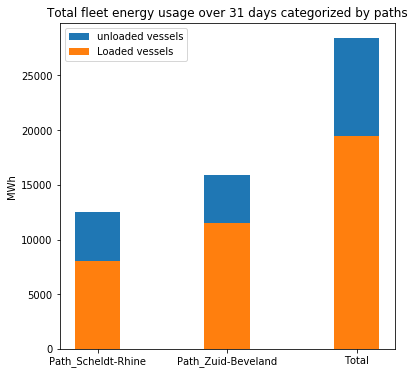

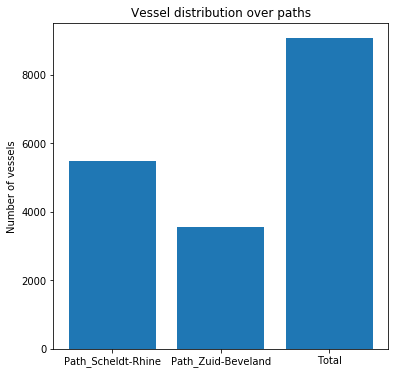

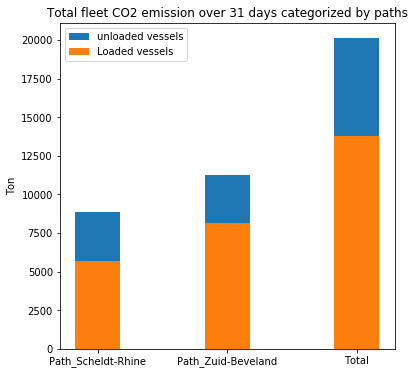

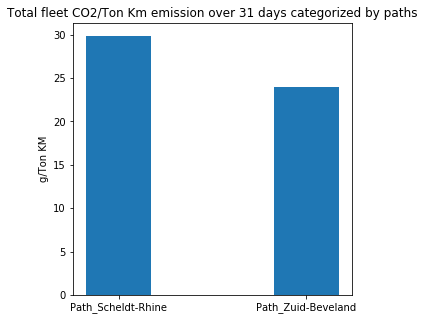

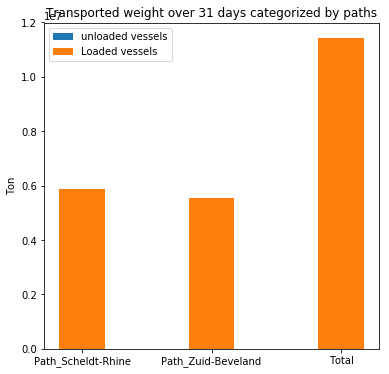

In [9]:
# Add graph to environment
env.FG = FG

env.paths = {}
env.enviromental_report = EnviromentReport()
# 24hours
SIM_TIME = 60 * 60  * 24 * 31
vessels = []

def pois(t):
    hour = int((t%(24*3600))/3600)
    average_on_hour = [5,6,7,8,10,11,12,16,18,20,19,20,19,18,17,15,15,13,11,10,9,7,6,4]
    number_of_boats_this_hour = np.random.normal(average_on_hour[hour])
    if number_of_boats_this_hour == 0:
        return 0
    return 60 * 60 / number_of_boats_this_hour

def setup(env, distribution):
    # initial vessel
    i = 1
    vessel = init_random_vessel(ordered_paths, "ship-{}".format(i))
    vessel.env = env
    vessel.geometry = nx.get_node_attributes(FG, "geometry")[vessel.route[0]]
    env.process(start(env, vessel))
    vessels.append(vessel)

    while True:
        #break
        # timeout before next ship is released
        i += 1
        yield env.timeout(distribution(env.now))
        vessel = init_random_vessel(ordered_paths, "ship-{}".format(i))
        vessel.env = env
        vessel.geometry = nx.get_node_attributes(FG, "geometry")[vessel.route[0]]
        env.process(start(env, vessel))
        vessels.append(vessel)
         
        

        
env.process(setup(env, pois))

env.crossover_points = {182: ((184, 394,154,155,156,216,217, 218), (164, 134,133, 132,73,72,71,402,401)),
                        2: ((218,217,216,156,155,154,394,184), (401, 402,71,72,73,132,133,134,164)),
                        141: ((140,139,179,178,379), (363, 364, 365, 317, 403)),
                        382: ((379,178,179,139,140), (403,317,365,364,363)),
                        273:((222,221,220,279), (272, 209, 208, 210)),
                        278: ((279,220,221,222), (210,208, 209,272))                        
}

env.epoch = datetime.datetime.now()


env.run(until=SIM_TIME)

# EnviromentReport notebook for plot calculations
env.enviromental_report.plot_energy_usage()
env.enviromental_report.plot_path_usage()
env.enviromental_report.plot_co2_emission()
env.enviromental_report.plot_co2_emission_km_load()
env.enviromental_report.plot_transported_weight_corridor()

In [10]:
env.enviromental_report.get_transported_weight_corridor()


{'Path_Scheldt-Rhine': {'loaded': 5878355.600000005, 'unloaded': 1762.15},
 'Path_Zuid-Beveland': {'loaded': 5537223.900000002, 'unloaded': 2795.0}}

In [11]:
vessel_log = pd.DataFrame.from_dict(vessels[0].log)
#
print(vessel_log.to_string())
print(len(vessels))


                                     Message     Timestamp Value                               Geometry
0                              Start sailing      0.000000                 POINT (4.4027792 51.6880539)
1    Sailing from node 263 to node 264 start      0.000000     0           POINT (4.4027792 51.6880539)
2     Sailing from node 263 to node 264 stop     48.673119     0           POINT (4.4000023 51.6864487)
3    Sailing from node 264 to node 248 start     48.673119     0           POINT (4.4000023 51.6864487)
4     Sailing from node 264 to node 248 stop     92.575953     0           POINT (4.3985059 51.6845369)
5    Sailing from node 248 to node 174 start     92.575953     0           POINT (4.3985059 51.6845369)
6     Sailing from node 248 to node 174 stop    251.119755     0           POINT (4.3893096 51.6794118)
7    Sailing from node 174 to node 171 start    251.119755     0           POINT (4.3893096 51.6794118)
8     Sailing from node 174 to node 171 stop    273.348254     0

Path_Scheldt-Rhine


C:\Users\leo1_\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


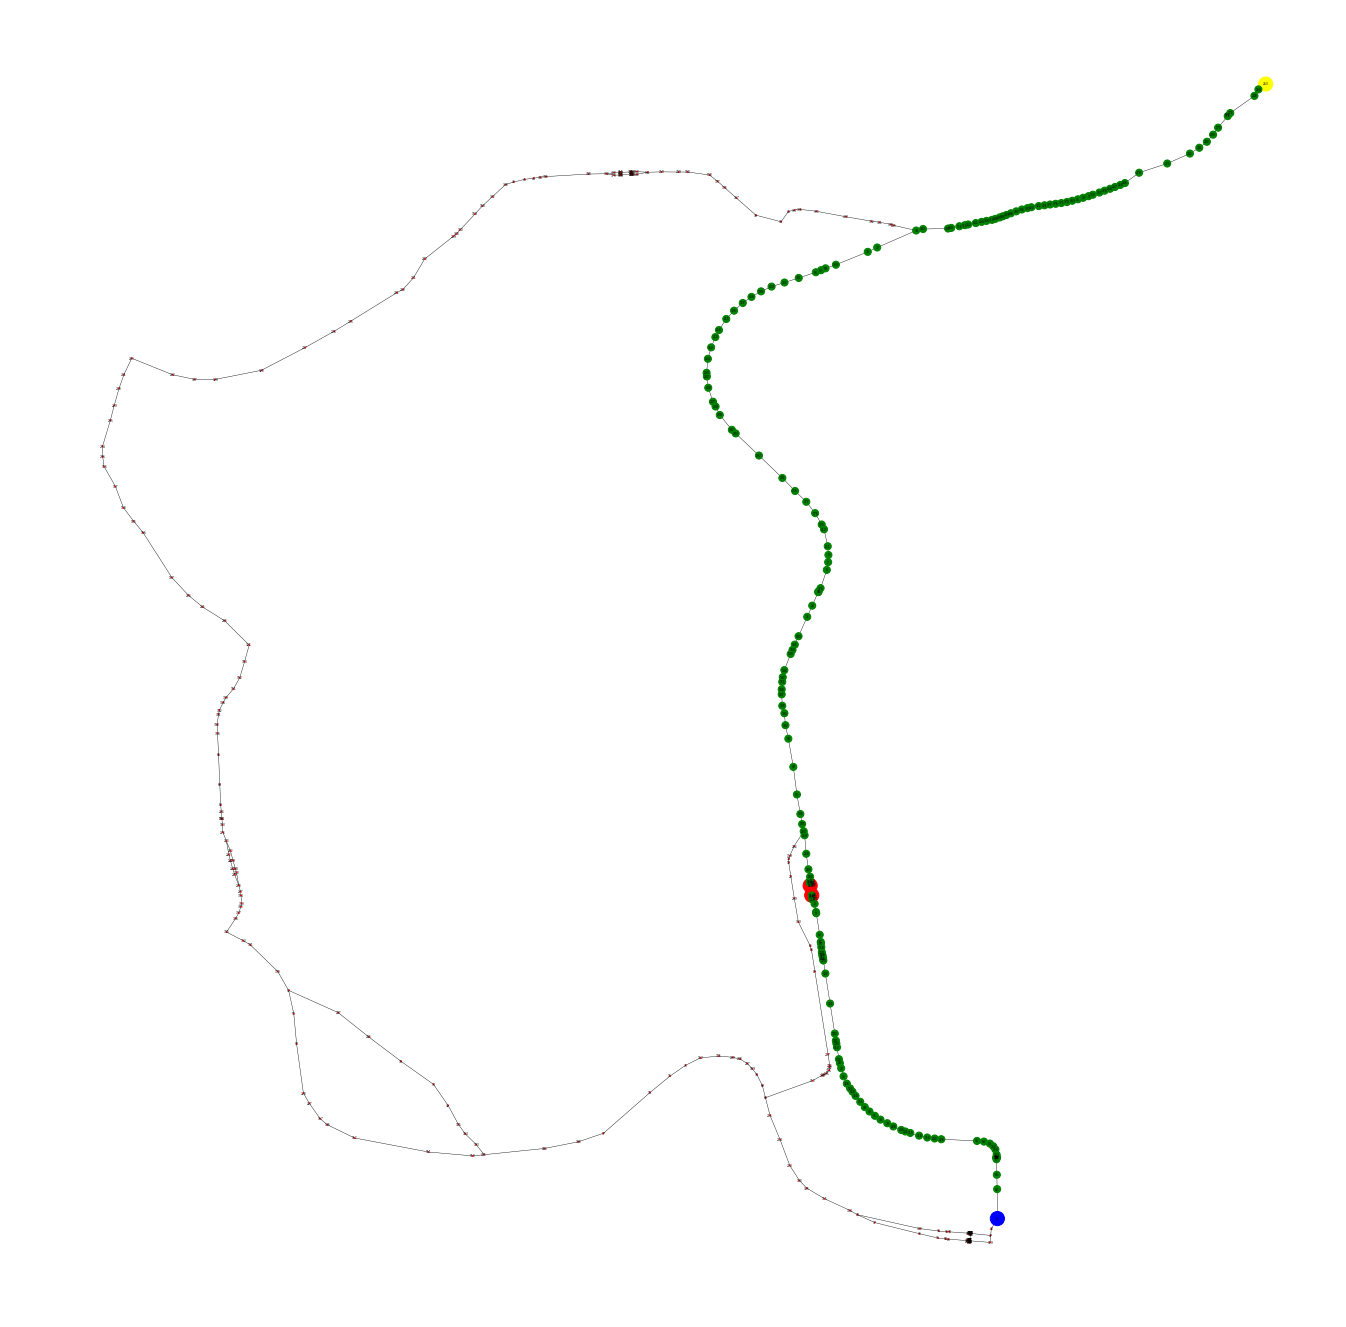

In [12]:
# running  saves a plot for all vessels
'''
for vessel in vessels[:10]:
    print(vessel.path_complete.name)
    vessel.path_complete.plot(FG, True, vessel.name)
''' 
print(vessels[3].path_complete.name)
vessels[2].path_complete.plot(FG, False, vessels[2].name)

In [13]:
# this way I can see activity at lock
for edge in FG.edges(data=True):
    if (edge[2]["Object"] == "Lock"):
        lock_log = pd.DataFrame.from_dict(edge[2]["attribute"].log)
        print(lock_log, edge[2]["attribute"].lock_name)

            Message     Timestamp      Value
0      Ship in lock  5.234139e+03     ship-2
1     Ship out lock  6.794139e+03     ship-2
2      Ship in lock  1.018933e+04     ship-5
3     Ship out lock  1.174933e+04     ship-5
4      Ship in lock  1.304997e+04     ship-4
5      Ship in lock  1.307128e+04     ship-8
6      Ship in lock  1.311236e+04     ship-7
7      Ship in lock  1.352669e+04     ship-6
8     Ship out lock  1.460997e+04     ship-4
9     Ship out lock  1.463128e+04     ship-8
10    Ship out lock  1.467236e+04     ship-7
11    Ship out lock  1.508669e+04     ship-6
12     Ship in lock  1.556997e+04    ship-11
13    Ship out lock  1.712997e+04    ship-11
14     Ship in lock  1.725671e+04    ship-27
15     Ship in lock  1.813192e+04    ship-17
16     Ship in lock  1.825930e+04    ship-14
17    Ship out lock  1.881671e+04    ship-27
18     Ship in lock  1.944274e+04    ship-29
19    Ship out lock  1.969192e+04    ship-17
20     Ship in lock  1.977671e+04    ship-25
21    Ship

In [14]:
print(vessels[0].path_complete.length)
print(vessels[0].loaded_capacity)
print(vessels[0].distance)
print(vessels[0].distance)
print(vessels[9100].loaded_capacity)



84567.37980081535
2795.0
84558.83309978346
84558.83309978346
4582.5


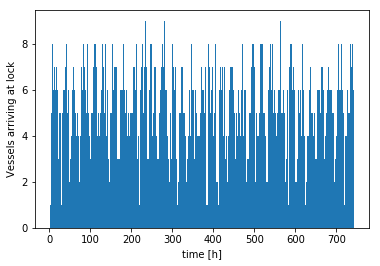

Kreekraklock


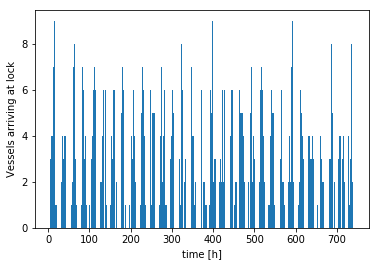

Kreekraklock


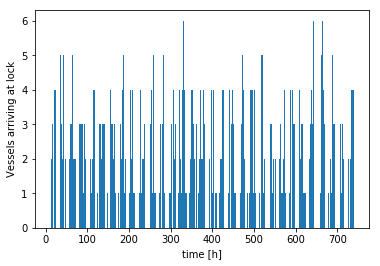

Krammerlock


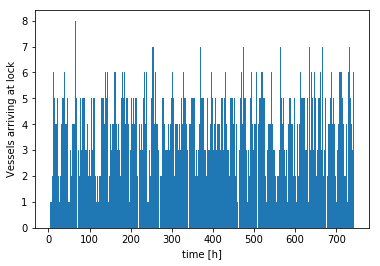

Hansweertlock


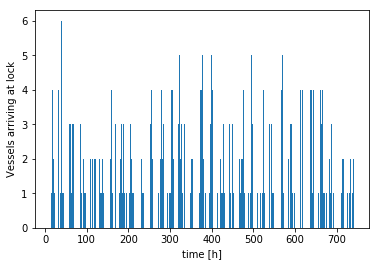

Hansweertlock


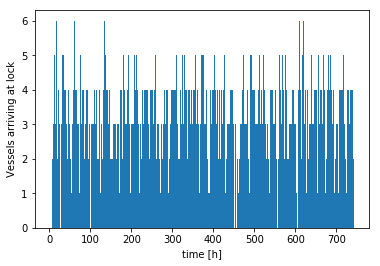

Krammerlock


In [15]:
# this way I can see activity at lock in graph
for edge in FG.edges(data=True):
    if (edge[2]["Object"] == "Lock"):
        edge[2]["attribute"].plot_arrivales()
        lock_log = pd.DataFrame.from_dict(edge[2]["attribute"].log)
        #print(lock_log, edge[2]["attribute"].lock_name)
        print(edge[2]["attribute"].lock_name)
           
        
